In [2]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# Clustering of Languages Based on Time and Strace

In [3]:
data = pandas.read_csv('language-times.tsv',sep='\t',index_col=0)
X_norm = (data - data.min())/(data.max() - data.min())
X_norm = X_norm.fillna(0)
X_norm.transpose()
X_norm=X_norm.loc[:,X_norm.sum()!=0]
X_norm

read_time  read_seconds  read_usecs/call  read_calls  write_calls  \
rust       0.0000      0.000000         0.000000    0.031546          0.0   
python     0.0000      0.000000         0.000000    0.324921          0.0   
clisp      1.0000      0.000284         0.000000    0.160883          0.5   
ruby       0.0000      0.000000         0.000000    0.176656          1.0   
cpp        0.0000      0.000000         0.000000    0.012618          0.0   
tcsh       0.0000      0.000000         0.000000    0.044164          0.0   
octave     0.2933      0.059666         0.014177    1.000000          0.5   
R          0.4401      0.155465         0.066521    0.539432          0.0   
cat        0.0000      0.000000         0.000000    0.009464          0.0   
julia      0.5915      0.121664         0.092694    0.302839          1.0   
go         0.0000      0.000000         0.000000    0.000000          0.0   
csh        0.0000      0.000000         0.000000    0.018927          0.0   
awk        0.0000      0.000000         0.000000    0.012618          0.0   
perl       0.9917      1.000000         1.000000    0.230284          0.5   
bash       0.0000      0.000000         0.000000    0.022082          0.0   
c          0.0000      0.000000         0.000000    0.003155          0.0   
zsh        0.0000      0.000000         0.000000    0.053628          0.0   

        open_time  open_seconds  open_calls  open_errors  close_time  \
rust     0.000000      0.000000    0.053076     0.054217         0.0   
python   0.000000      0.000000    0.331725     0.316265         0.0   
clisp    0.000000      0.000000    0.114596     0.111446         0.0   
ruby     0.000000      0.000000    0.196622     0.197289         0.0   
cpp      0.000000      0.000000    0.042220     0.045181         0.0   
tcsh     0.000000      0.000000    0.094089     0.082831         0.0   
octave   1.000000      1.000000    1.000000     1.000000         1.0   
R        0.022388      0.038356    0.454765     0.349398         0.0   
cat      0.000000      0.000000    0.019300     0.018072         0.0   
julia    0.000000      0.000000    0.249698     0.259036         0.0   
go       0.000000      0.000000    0.000000     0.000000         0.0   
csh      0.000000      0.000000    0.031363     0.030120         0.0   
awk      0.000000      0.000000    0.026538     0.027108         0.0   
perl     0.000000      0.000000    0.162847     0.108434         0.0   
bash     0.000000      0.000000    0.041013     0.037651         0.0   
c        0.000000      0.000000    0.016888     0.018072         0.0   
zsh      0.000000      0.000000    0.100121     0.091867         0.0   

              ...         mincore_calls  mincore_errors  \
rust          ...                   0.0             0.0   
python        ...                   0.0             0.0   
clisp         ...                   0.0             0.0   
ruby          ...                   0.0             0.0   
cpp           ...                   0.0             0.0   
tcsh          ...                   0.0             0.0   
octave        ...                   0.0             0.0   
R             ...                   0.0             0.0   
cat           ...                   0.0             0.0   
julia         ...                   1.0             1.0   
go            ...                   0.0             0.0   
csh           ...                   0.0             0.0   
awk           ...                   0.0             0.0   
perl          ...                   0.0             0.0   
bash          ...                   0.0             0.0   
c             ...                   0.0             0.0   
zsh           ...                   0.0             0.0   

        sched_setaffinity_calls  epoll_wait_calls  epoll_ctl_calls  \
rust                        0.0               0.0              0.0   
python                      0.0               0.0              0.0   
clisp                       0.0               0.0  

In [4]:
def plot2d(transformed,title=None, show=False):
    '''plot a scatterplot. Index should be labels of the transformed
       dataframe
    '''
    plt.subplots_adjust(bottom = 0.1)
    plt.scatter(transformed[0], 
                transformed[1], 
                marker='o',
                cmap=plt.get_cmap('Spectral'))

    if title is not None:
        plt.title(title, loc='right')
    for row in transformed.iterrows():
        label = row[0]
        x,y = row[1].tolist()
        plt.annotate(
            label,
            xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.1', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    plt.legend()
    if show is True:
        plt.show()
    return plt

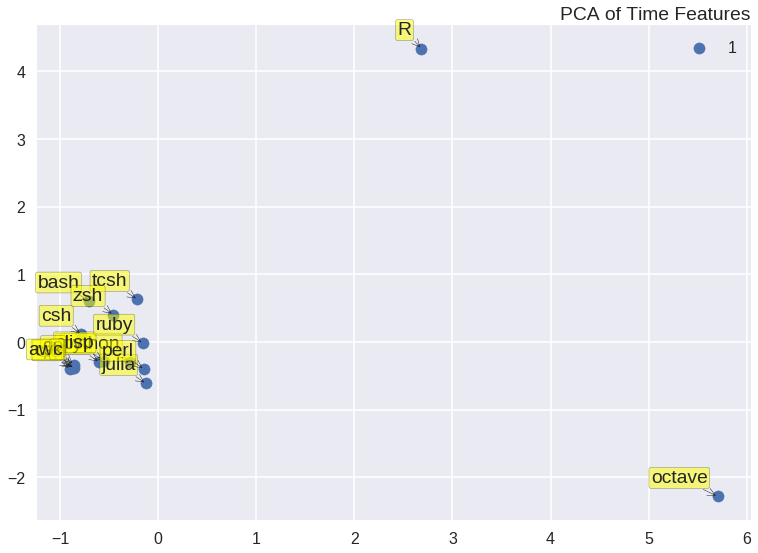

<module 'matplotlib.pyplot' from '/home/vanessa/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [5]:
###### PCA
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pandas.DataFrame(pca.fit_transform(X_norm))
labels=X_norm.index.tolist()
transformed.index=labels
plot2d(transformed, title="PCA of Time Features", show=True)

In [6]:
data = pandas.read_csv('language-features.tsv',sep='\t',index_col=0)
X_norm = (data - data.min())/(data.max() - data.min())
X_norm = X_norm.fillna(0)
X_norm.transpose()
X_norm=X_norm.loc[:,X_norm.sum()!=0]
X_norm
y=X_norm.index.tolist()
X_norm

/scif/apps/rust/bin/hello-world.rust  hello-world.rust  / 76 vars /)  \
rust                                     1.0               1.0           0.5   
python                                   0.0               0.0           0.5   
clisp                                    0.0               0.0           1.0   
ruby                                     0.0               0.0           0.5   
cpp                                      0.0               0.0           0.5   
tcsh                                     0.0               0.0           0.5   
octave                                   0.0               0.0           1.0   
R                                        0.0               0.0           0.5   
cat                                      0.0               0.0           0.5   
julia                                    0.0               0.0           0.5   
go                                       0.0               0.0           0.0   
csh                                      0.0               0.0           0.5   
awk                                      0.0               0.0           0.5   
perl                                     0.0               0.0           0.5   
bash                                     0.0               0.0           0.5   
c                                        0.0               0.0           0.5   
zsh                                      0.0               0.0           0.5   

        return-code_0  execve        0)  return-code_0x905bb05000       brk  \
rust         0.010652     0.0  0.046025                       1.0  0.001567   
python       0.110902     0.0  0.205021                       0.0  0.008621   
clisp        0.057644     0.5  0.179916                       0.0  0.005486   
ruby         0.060777     0.0  0.087866                       0.0  0.017241   
cpp          0.003446     0.0  0.025105                       0.0  0.000784   
tcsh         0.049499     0.0  0.146444                       0.0  0.047022   
octave       1.000000     0.5  1.000000                       0.0  0.033699   
R            0.282581     1.0  0.807531                       0.0  0.110502   
cat          0.002506     0.0  0.004184                       0.0  0.002351   
julia        0.138784     0.0  0.259414                       0.0  0.173197   
go           0.035714     0.0  0.000000                       0.0  0.000000   
csh          0.348058     0.0  0.075314                       0.0  0.002351   
awk          0.002820     0.0  0.008368                       0.0  0.002351   
perl         0.123120     0.0  0.330544                       0.0  1.000000   
bash         0.015351     0.0  0.020921                       0.0  0.015674   
c            0.000000     0.0  0.000000                       0.0  0.000784   
zsh          0.042293     0.0  0.125523                       0.0  0.002351   

        /etc/ld.so.nohwcap  F_OK) = -1 ENOENT (No such file or directory)  \
rust              0.056075                                       0.056075   
python            0.065421                                       0.065421   
clisp             0.112150                                       0.112150   
ruby              0.074766                                       0.074766   
cpp               0.046729                                       0.046729   
tcsh              0.074766                                       0.074766   
octave            1.000000                                       1.000000   
R                 0.242991                                       0.242991   
cat               0.018692                                       0.018692   
julia             0.140187                                       0.140187   
go                0.000000                                       0.000000   
csh               0.028037                                       0.028037   
awk               0.028037                                       0.028037   
perl              0.112150                                       0

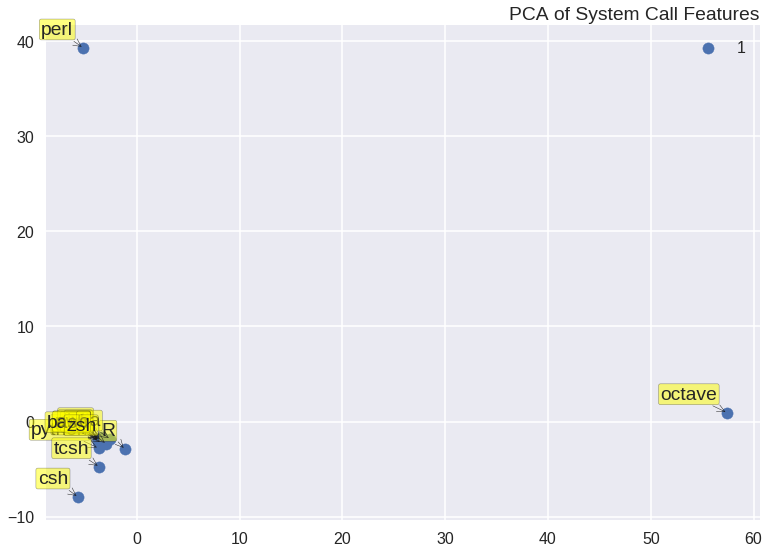

<module 'matplotlib.pyplot' from '/home/vanessa/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [7]:
###### PCA
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pandas.DataFrame(pca.fit_transform(X_norm))
labels=X_norm.index.tolist()
transformed.index=labels
plot2d(transformed, title="PCA of System Call Features", show=True)

# Evaluation per Metric

In [8]:
data = pandas.read_csv('language-times.tsv',sep='\t',index_col=0)
X_norm = (data - data.min())/(data.max() - data.min())
X_norm = X_norm.fillna(0)
X_norm.transpose()
X_norm=X_norm.loc[:,X_norm.sum()!=0]
X_norm

read_time  read_seconds  read_usecs/call  read_calls  write_calls  \
rust       0.0000      0.000000         0.000000    0.031546          0.0   
python     0.0000      0.000000         0.000000    0.324921          0.0   
clisp      1.0000      0.000284         0.000000    0.160883          0.5   
ruby       0.0000      0.000000         0.000000    0.176656          1.0   
cpp        0.0000      0.000000         0.000000    0.012618          0.0   
tcsh       0.0000      0.000000         0.000000    0.044164          0.0   
octave     0.2933      0.059666         0.014177    1.000000          0.5   
R          0.4401      0.155465         0.066521    0.539432          0.0   
cat        0.0000      0.000000         0.000000    0.009464          0.0   
julia      0.5915      0.121664         0.092694    0.302839          1.0   
go         0.0000      0.000000         0.000000    0.000000          0.0   
csh        0.0000      0.000000         0.000000    0.018927          0.0   
awk        0.0000      0.000000         0.000000    0.012618          0.0   
perl       0.9917      1.000000         1.000000    0.230284          0.5   
bash       0.0000      0.000000         0.000000    0.022082          0.0   
c          0.0000      0.000000         0.000000    0.003155          0.0   
zsh        0.0000      0.000000         0.000000    0.053628          0.0   

        open_time  open_seconds  open_calls  open_errors  close_time  \
rust     0.000000      0.000000    0.053076     0.054217         0.0   
python   0.000000      0.000000    0.331725     0.316265         0.0   
clisp    0.000000      0.000000    0.114596     0.111446         0.0   
ruby     0.000000      0.000000    0.196622     0.197289         0.0   
cpp      0.000000      0.000000    0.042220     0.045181         0.0   
tcsh     0.000000      0.000000    0.094089     0.082831         0.0   
octave   1.000000      1.000000    1.000000     1.000000         1.0   
R        0.022388      0.038356    0.454765     0.349398         0.0   
cat      0.000000      0.000000    0.019300     0.018072         0.0   
julia    0.000000      0.000000    0.249698     0.259036         0.0   
go       0.000000      0.000000    0.000000     0.000000         0.0   
csh      0.000000      0.000000    0.031363     0.030120         0.0   
awk      0.000000      0.000000    0.026538     0.027108         0.0   
perl     0.000000      0.000000    0.162847     0.108434         0.0   
bash     0.000000      0.000000    0.041013     0.037651         0.0   
c        0.000000      0.000000    0.016888     0.018072         0.0   
zsh      0.000000      0.000000    0.100121     0.091867         0.0   

              ...         mincore_calls  mincore_errors  \
rust          ...                   0.0             0.0   
python        ...                   0.0             0.0   
clisp         ...                   0.0             0.0   
ruby          ...                   0.0             0.0   
cpp           ...                   0.0             0.0   
tcsh          ...                   0.0             0.0   
octave        ...                   0.0             0.0   
R             ...                   0.0             0.0   
cat           ...                   0.0             0.0   
julia         ...                   1.0             1.0   
go            ...                   0.0             0.0   
csh           ...                   0.0             0.0   
awk           ...                   0.0             0.0   
perl          ...                   0.0             0.0   
bash          ...                   0.0             0.0   
c             ...                   0.0             0.0   
zsh           ...                   0.0             0.0   

        sched_setaffinity_calls  epoll_wait_calls  epoll_ctl_calls  \
rust                        0.0               0.0              0.0   
python                      0.0               0.0              0.0   
clisp                       0.0               0.0  

/home/vanessa/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


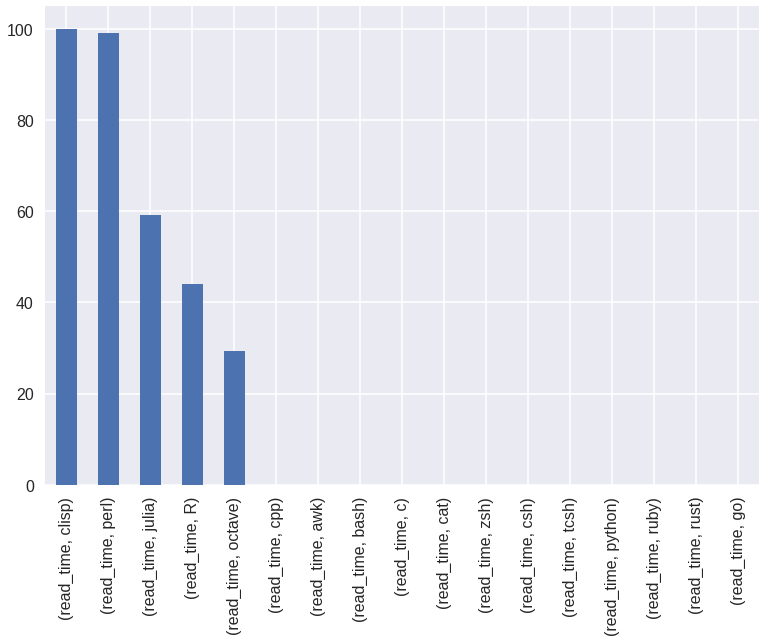

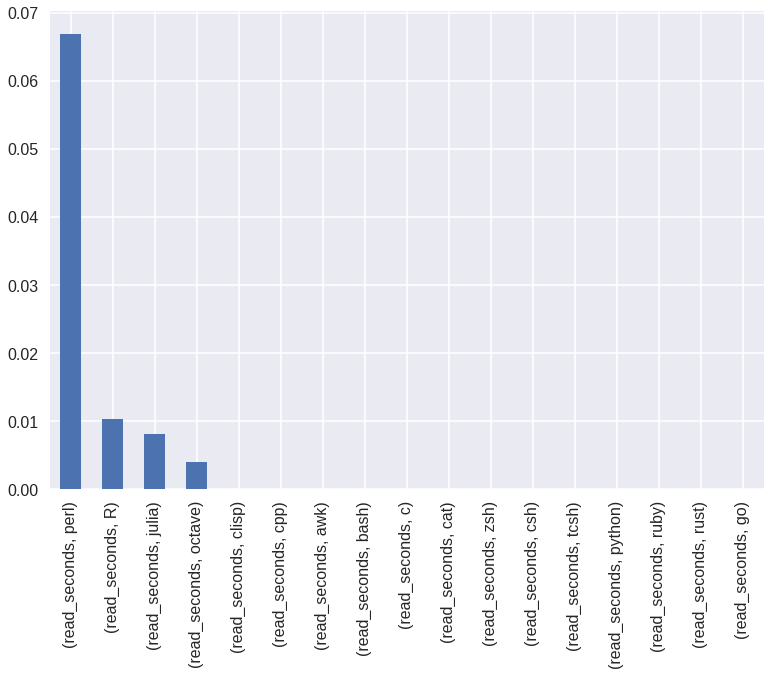

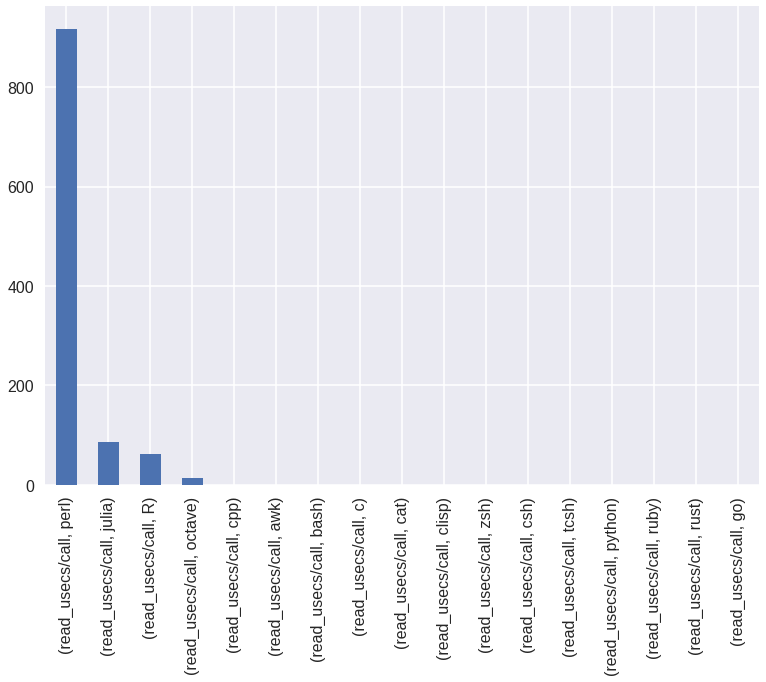

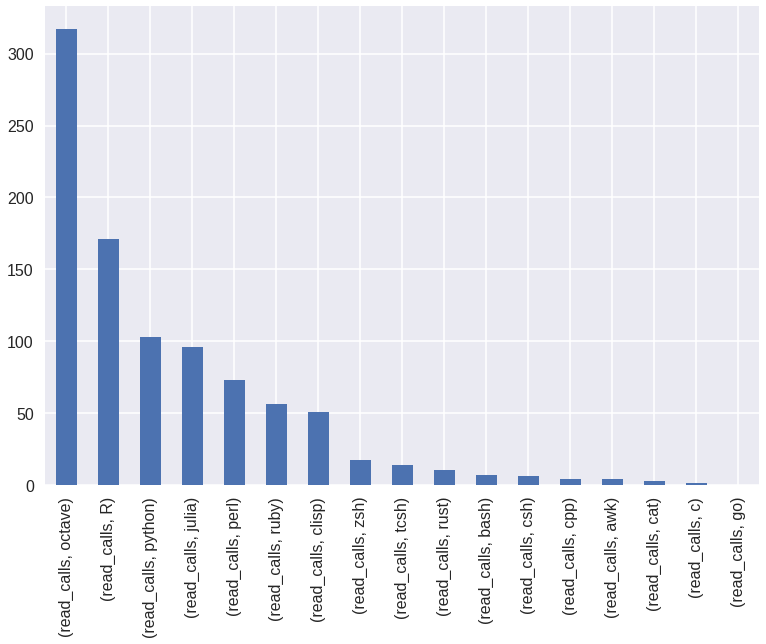

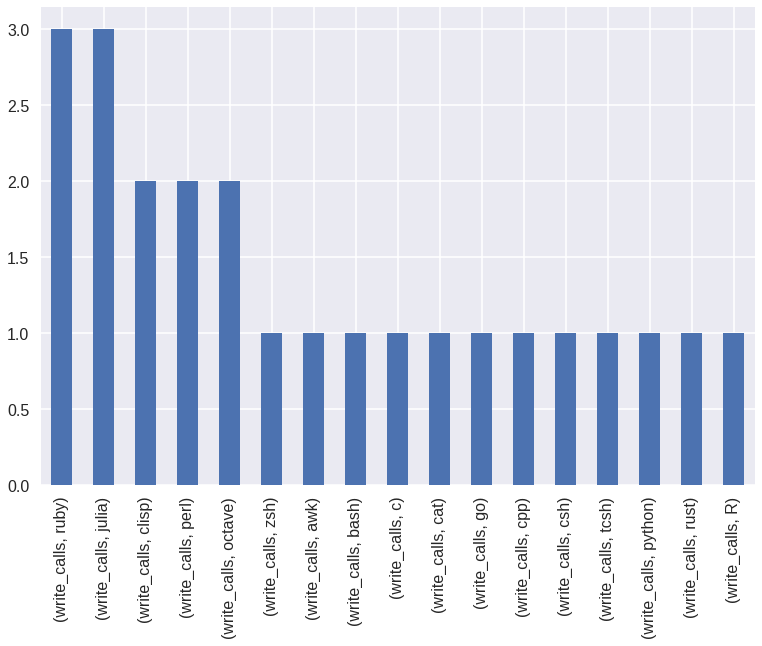

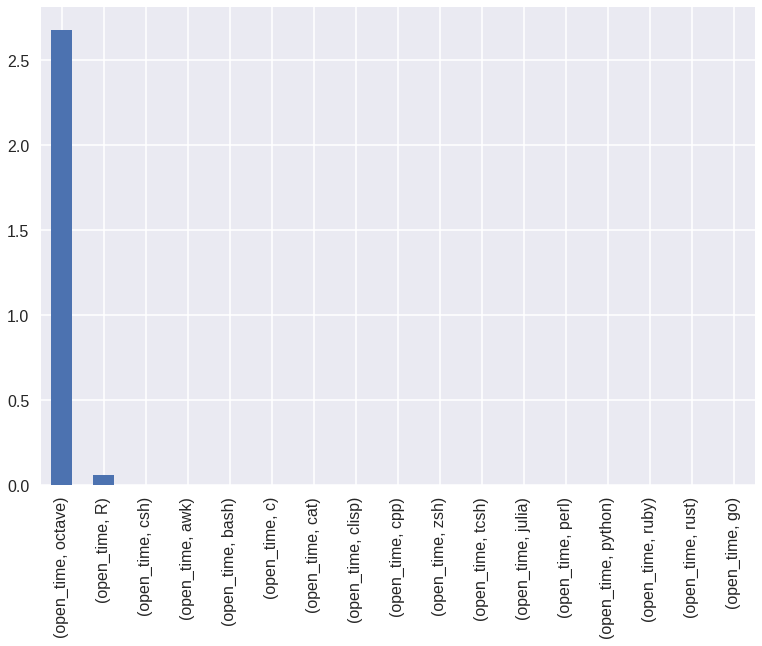

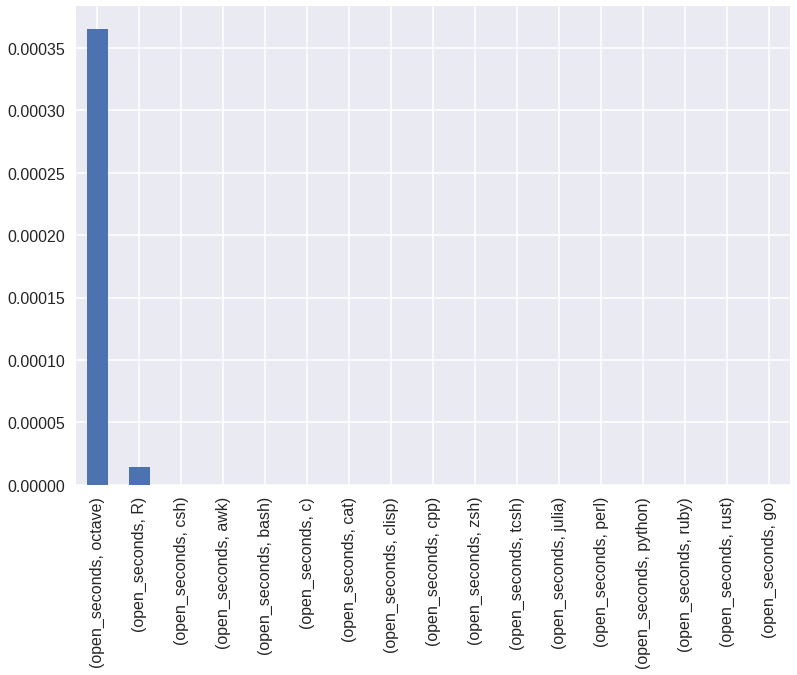

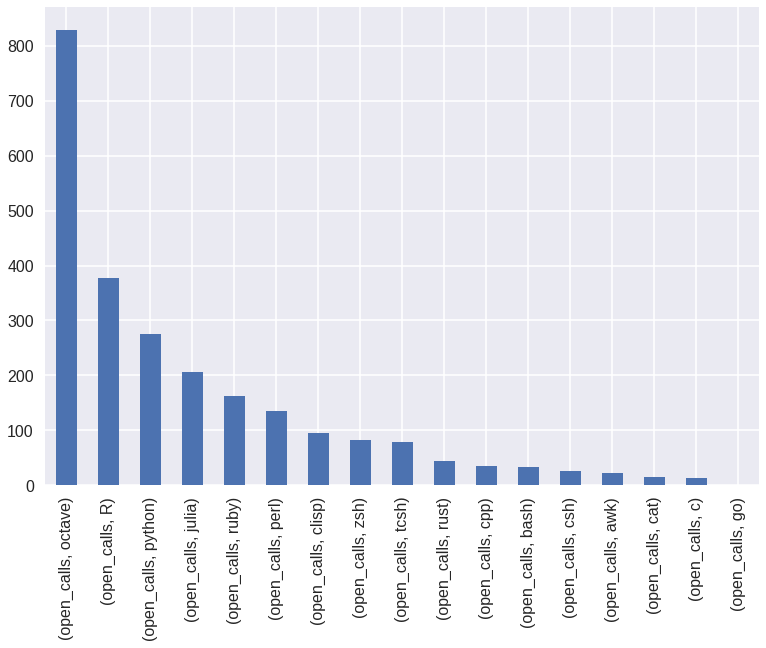

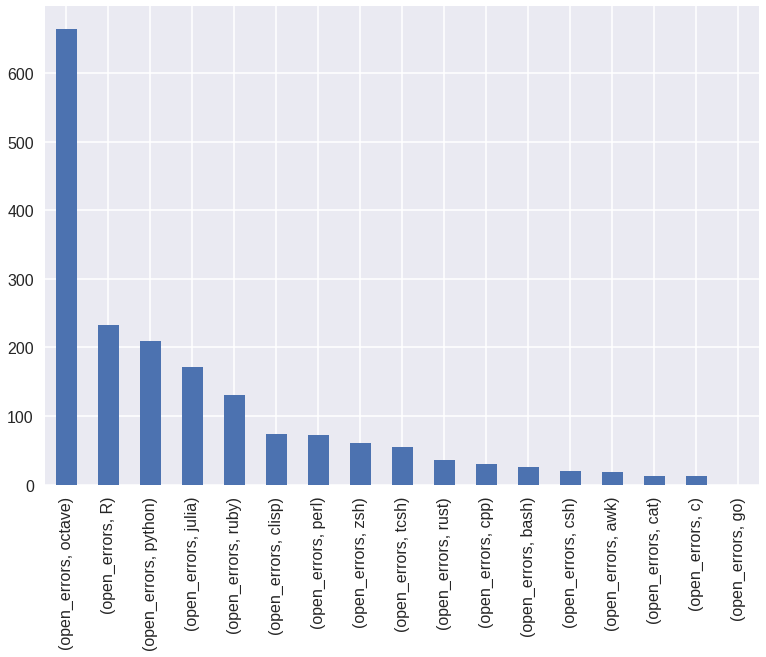

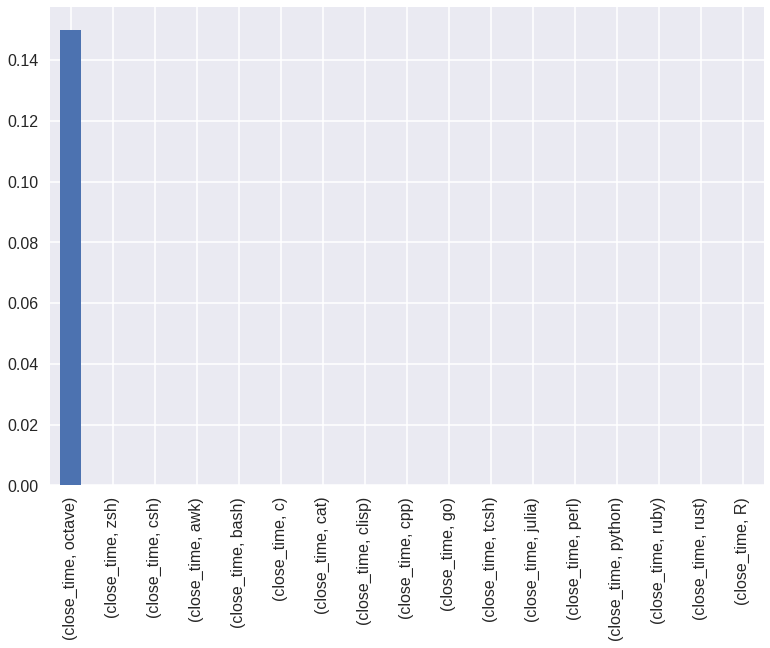

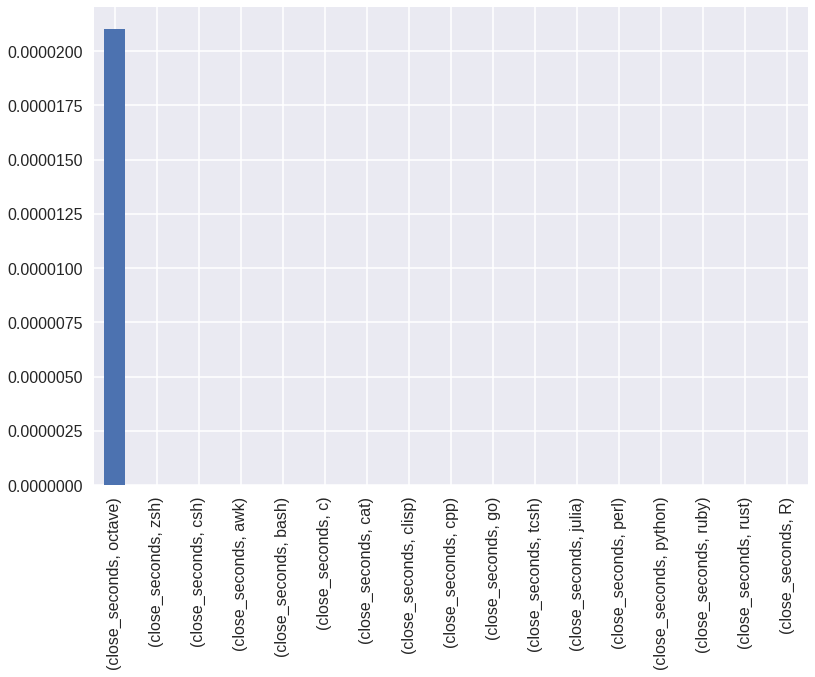

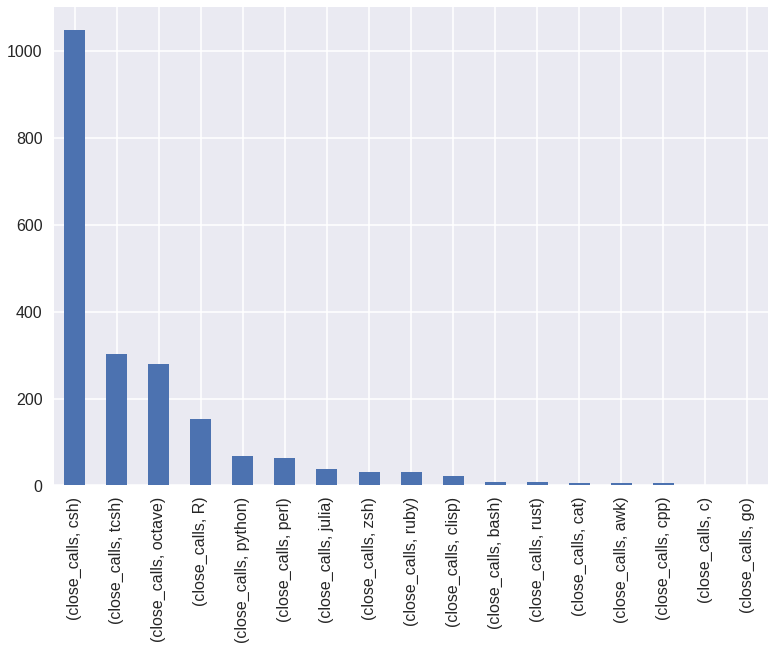

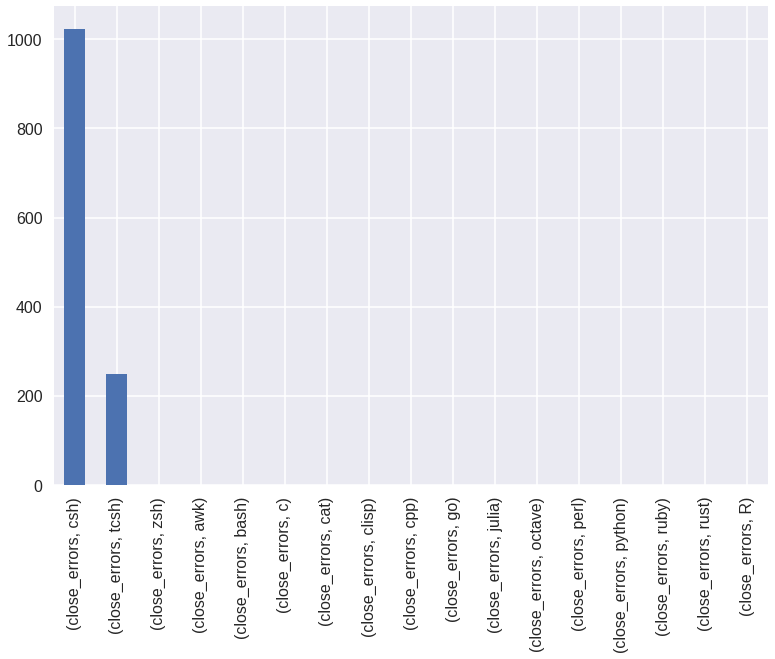

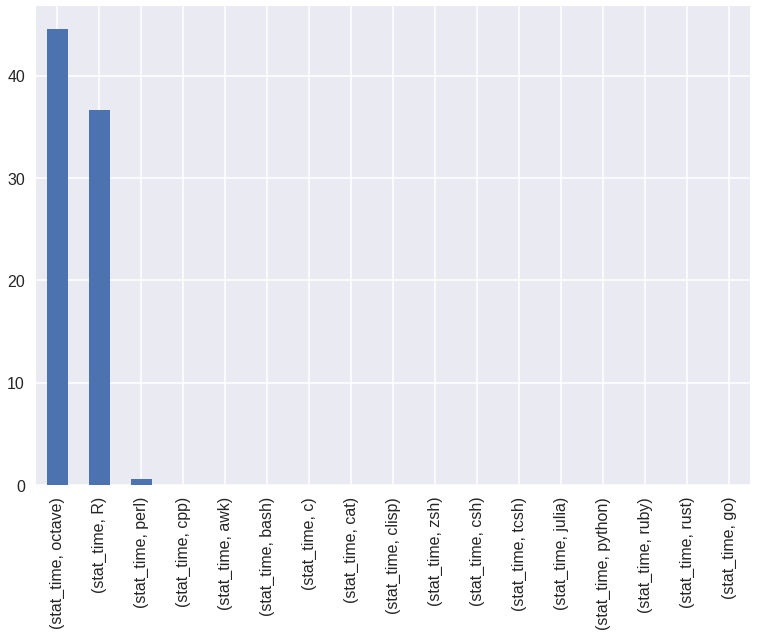

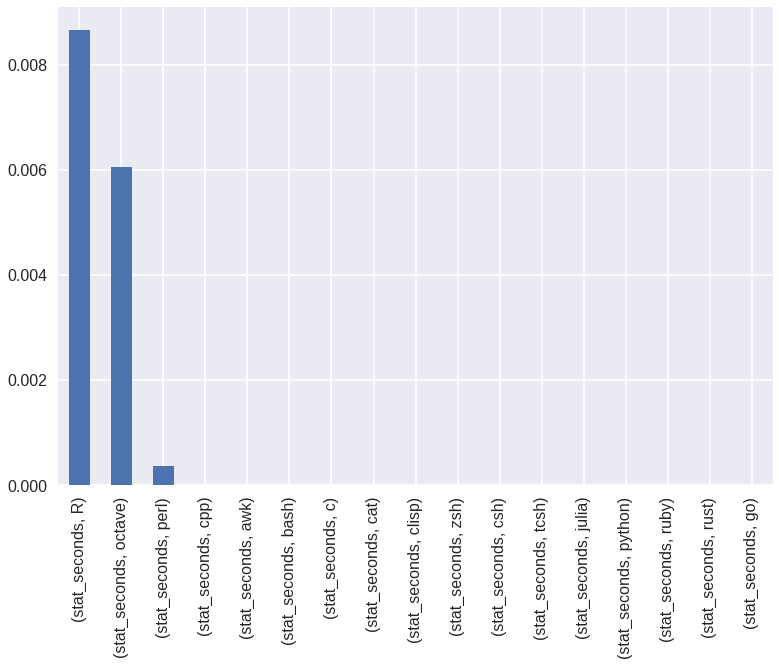

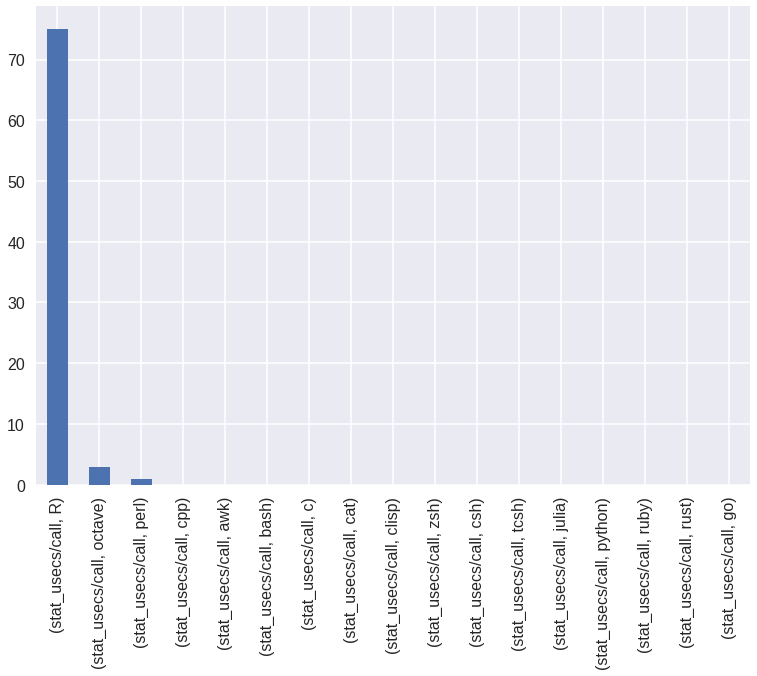

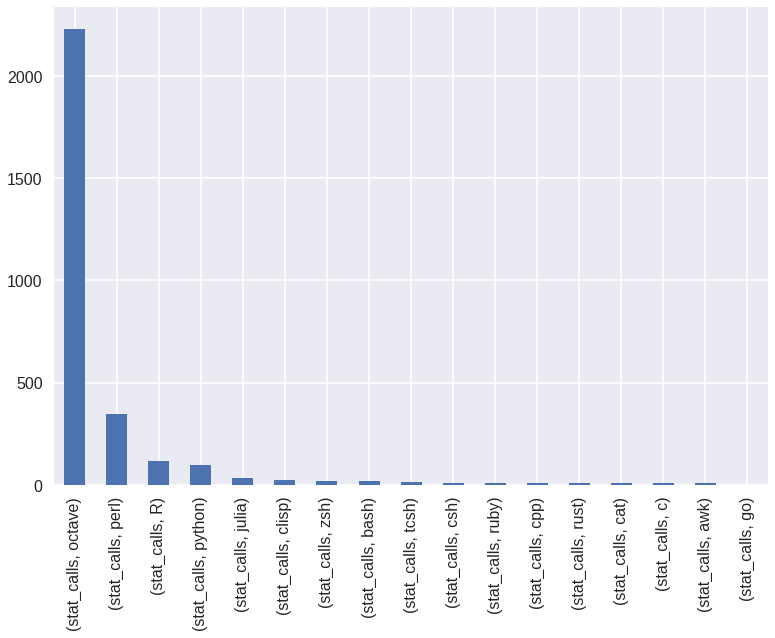

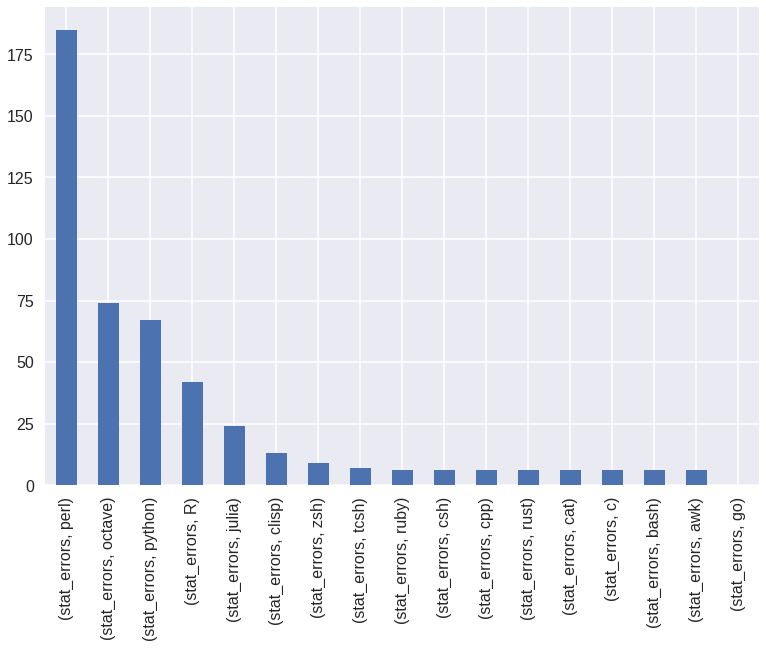

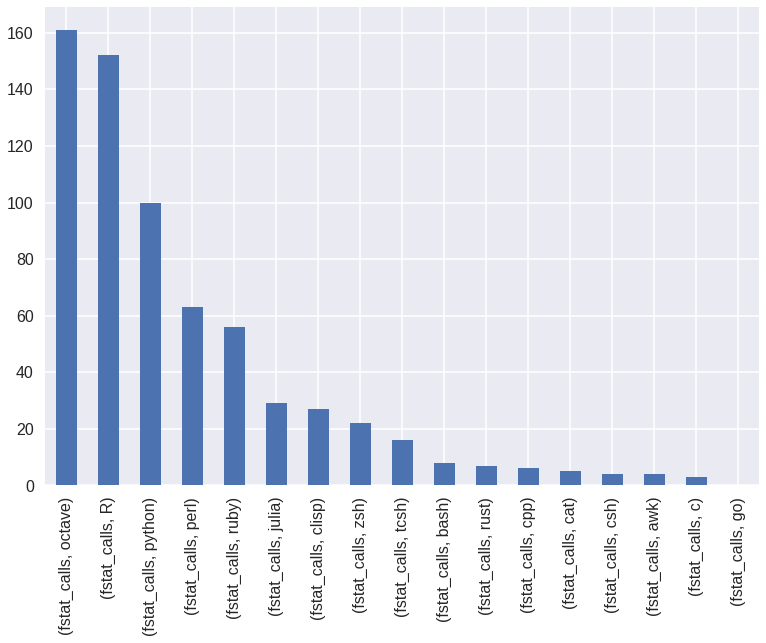

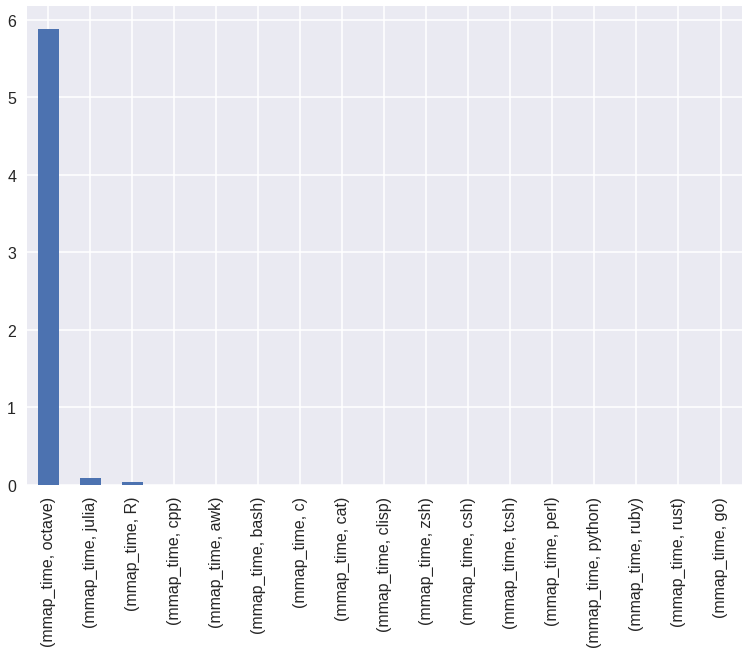

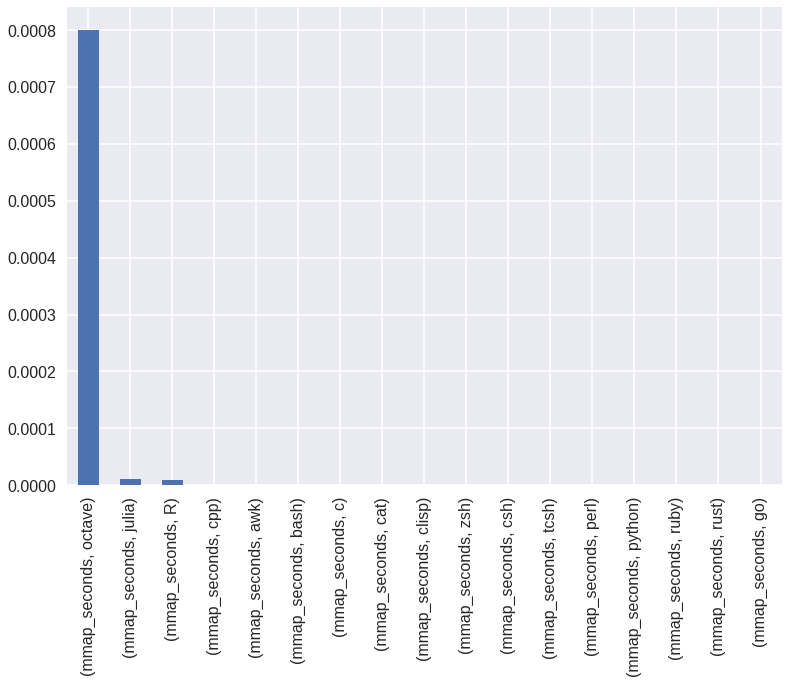

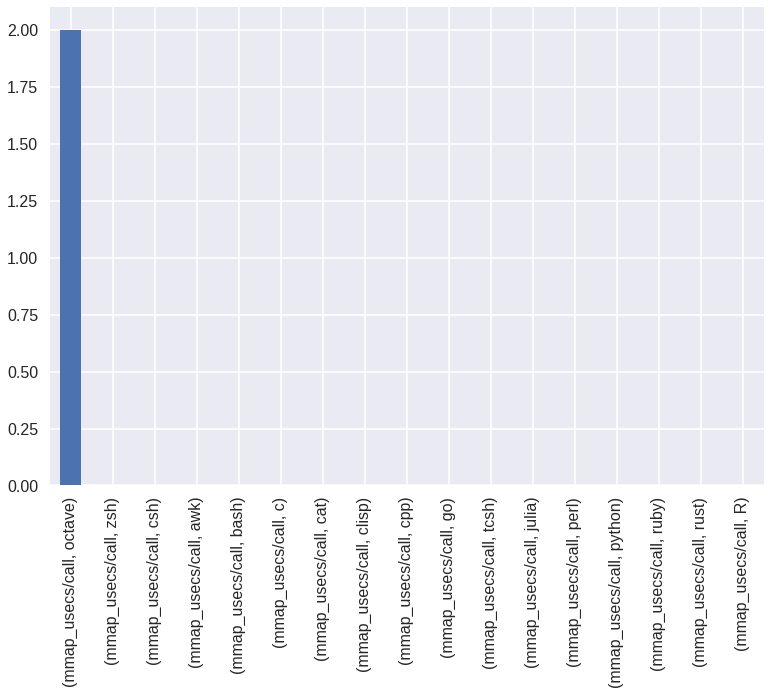

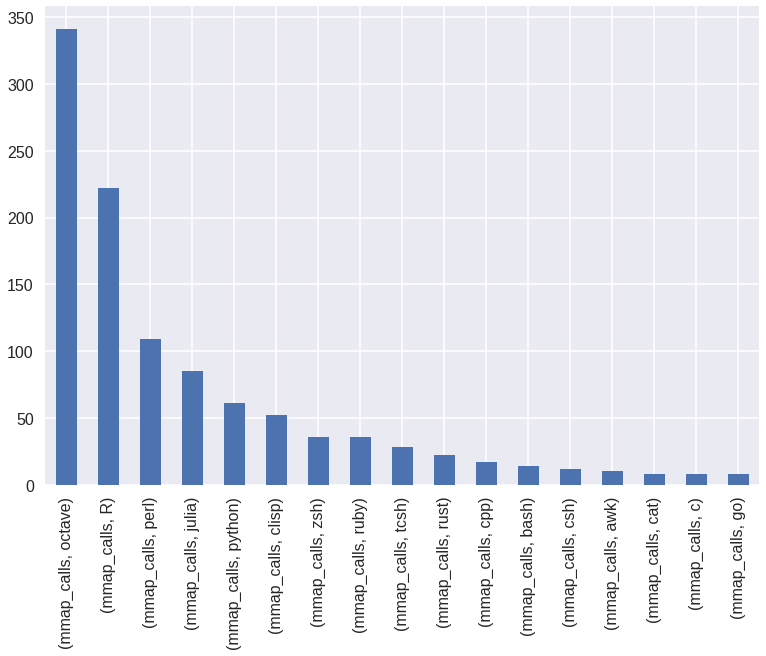

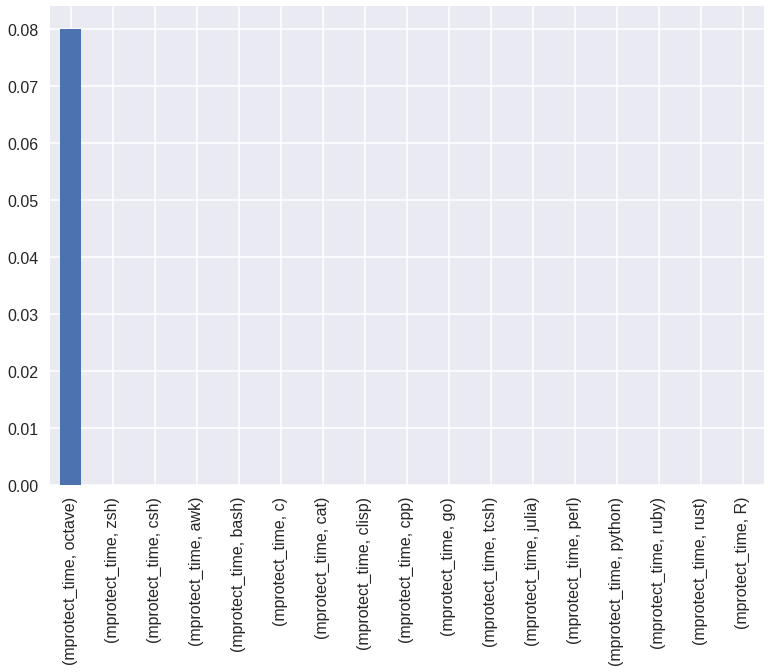

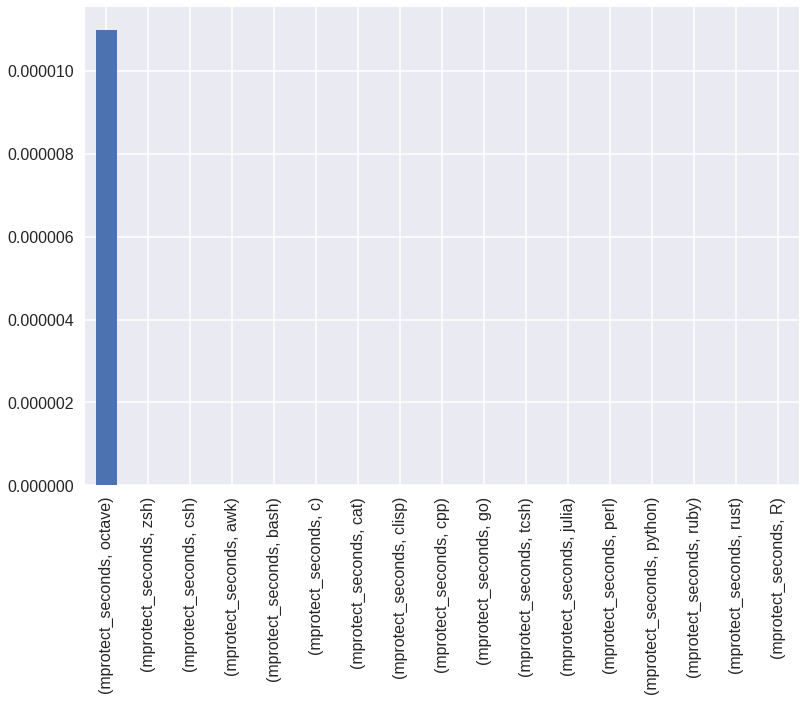

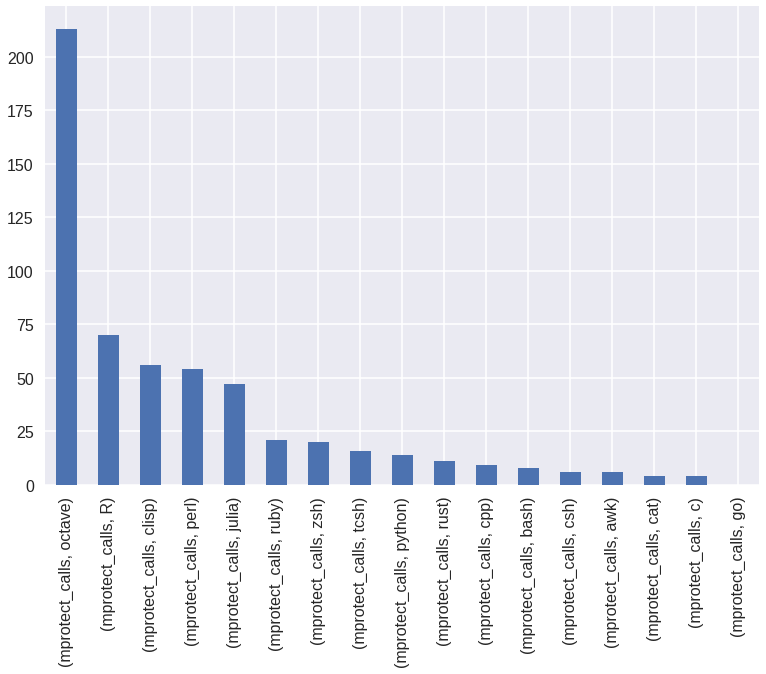

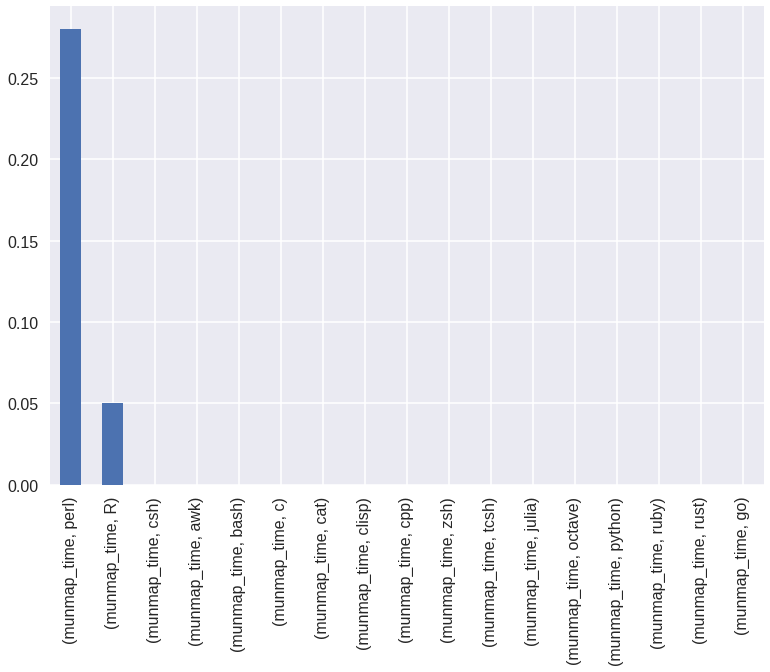

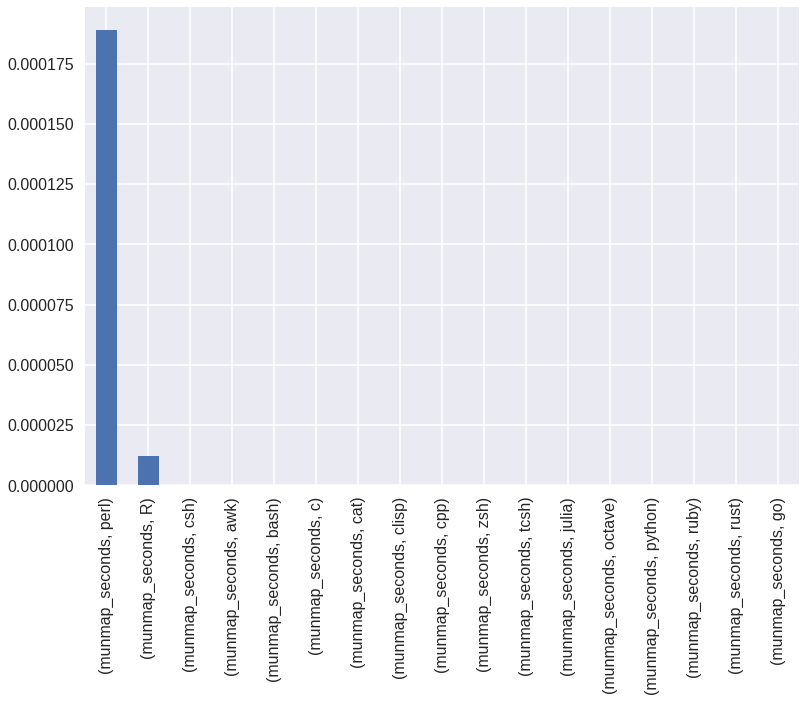

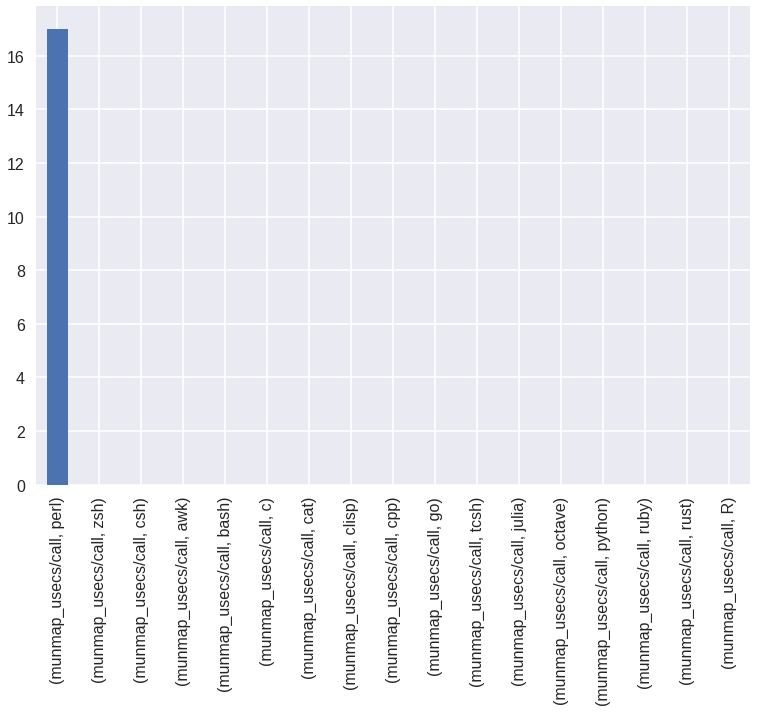

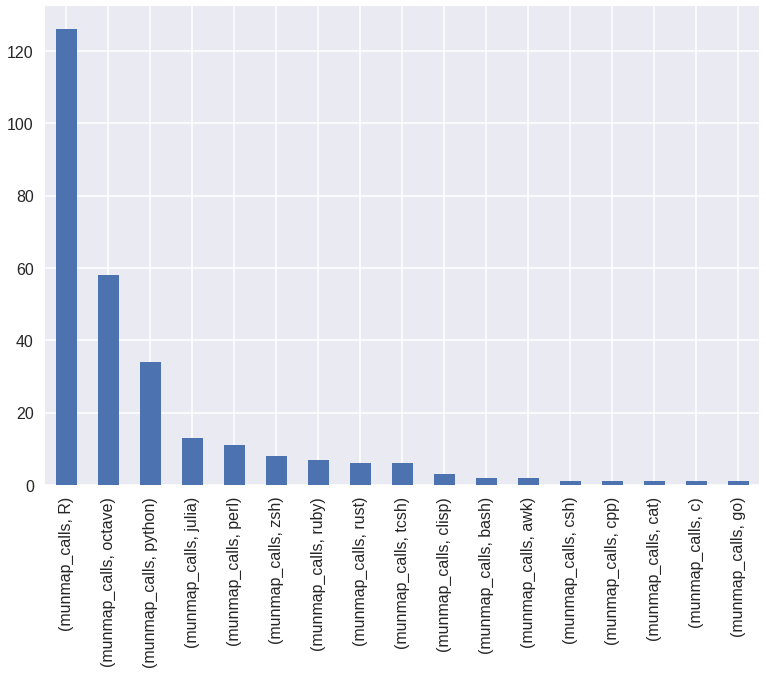

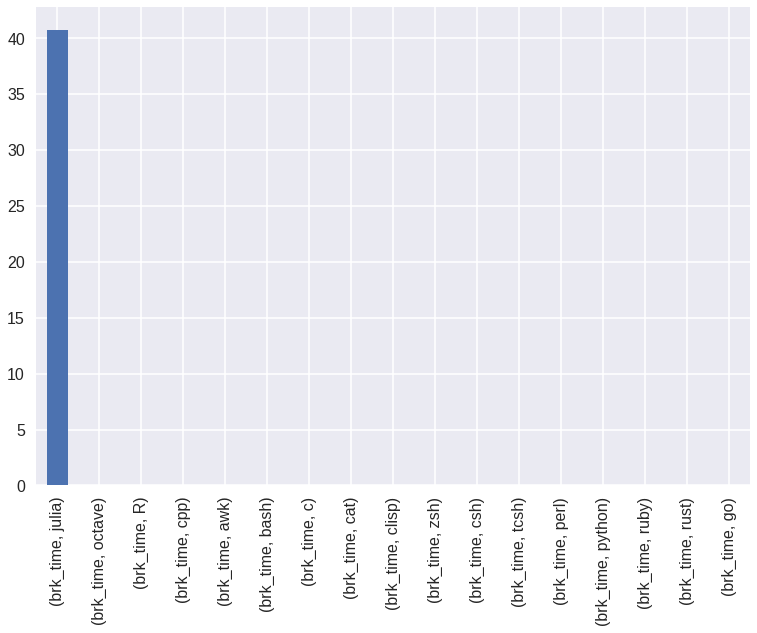

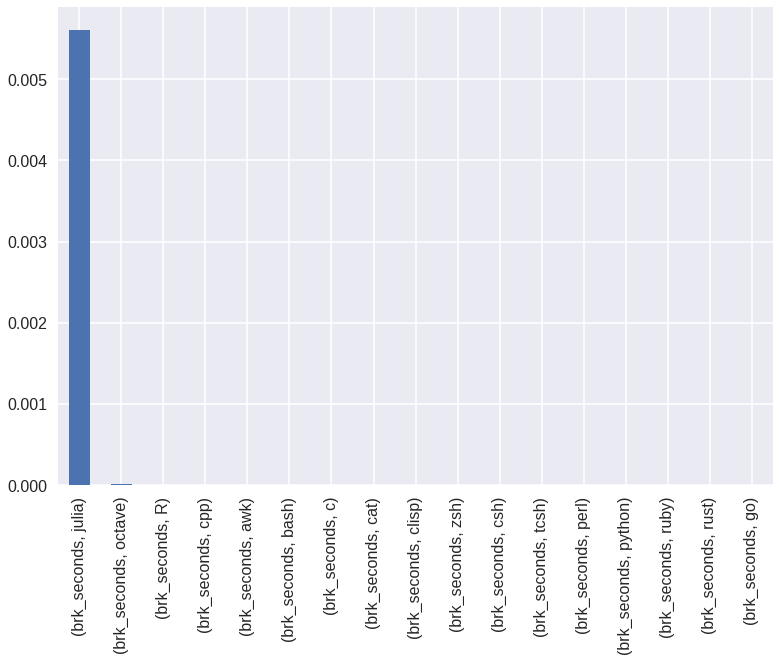

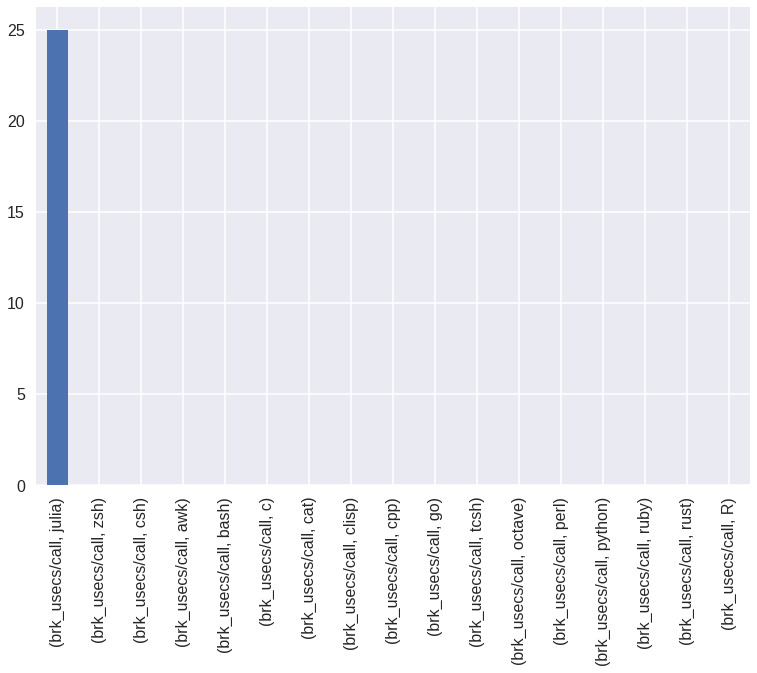

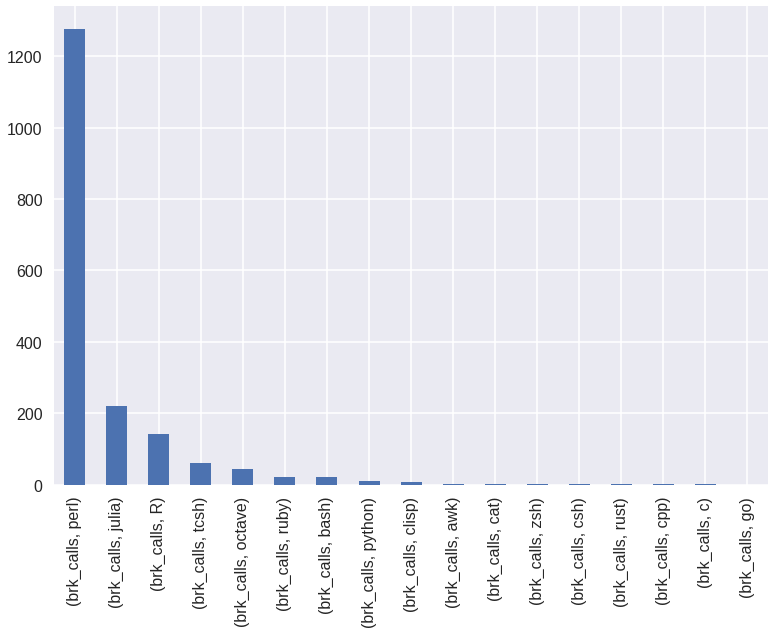

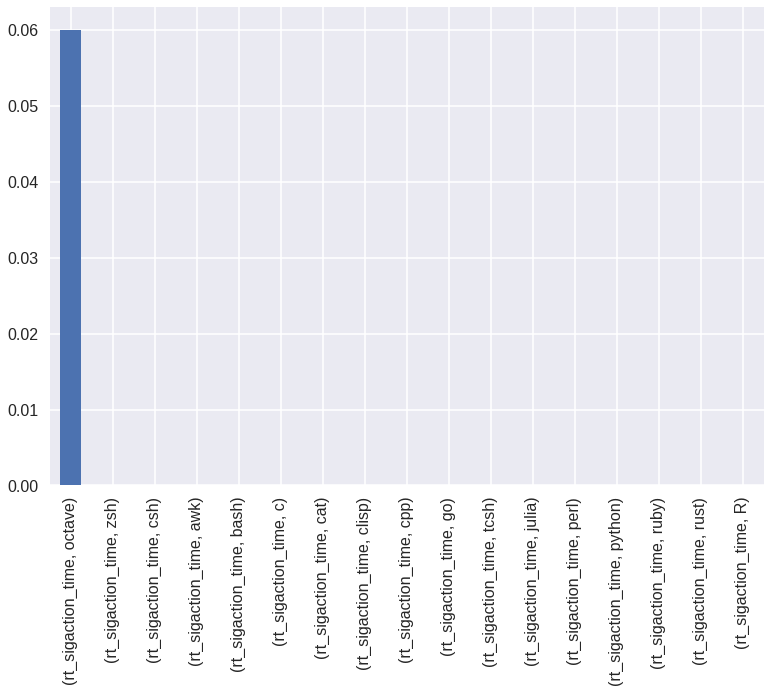

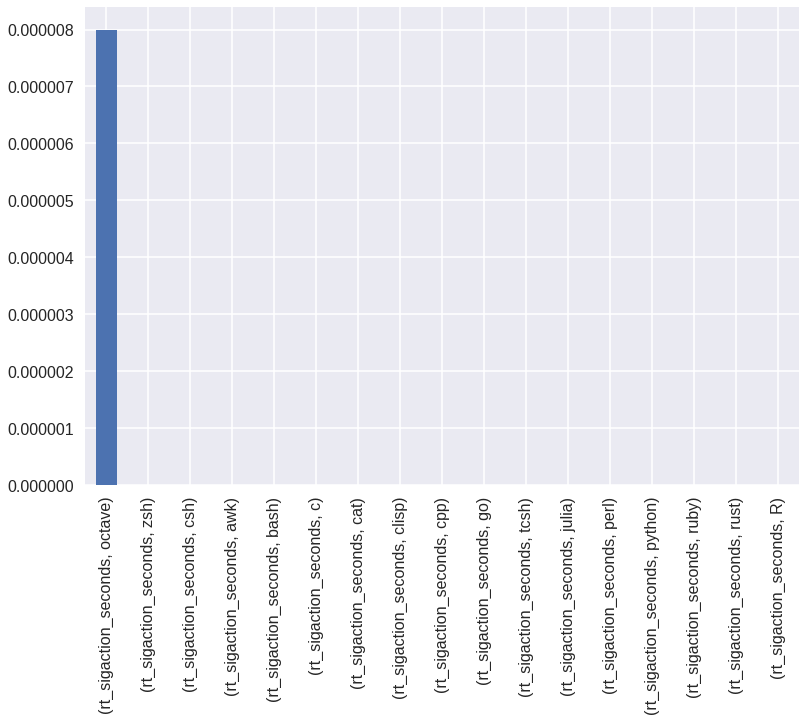

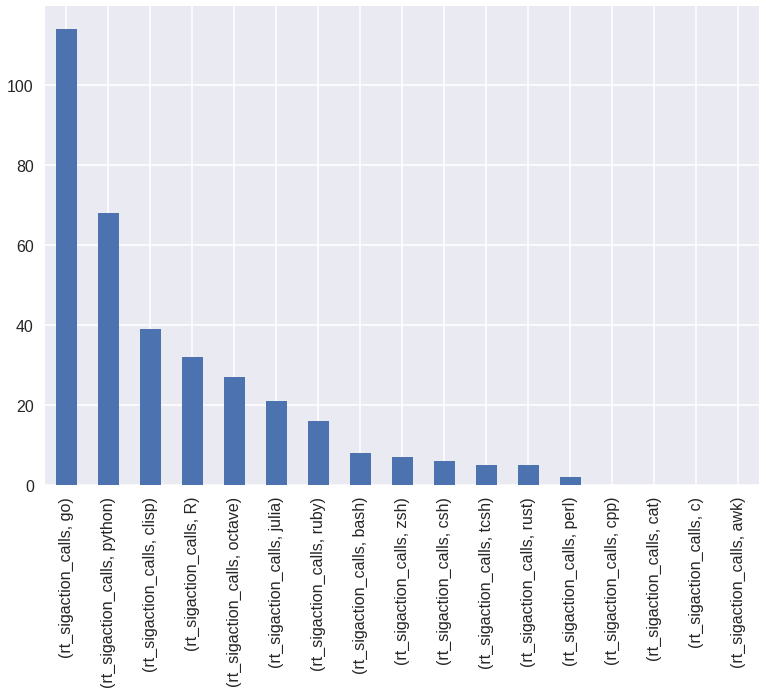

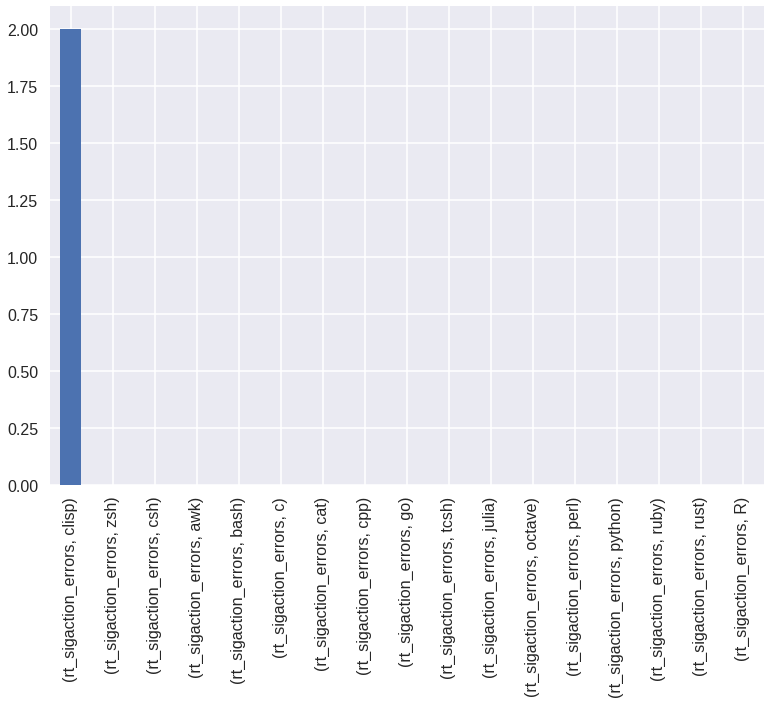

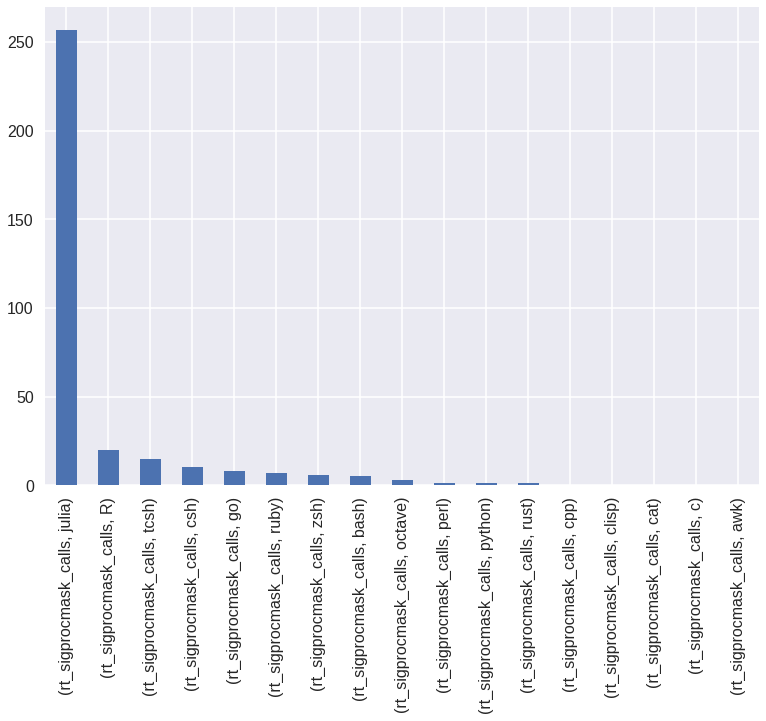

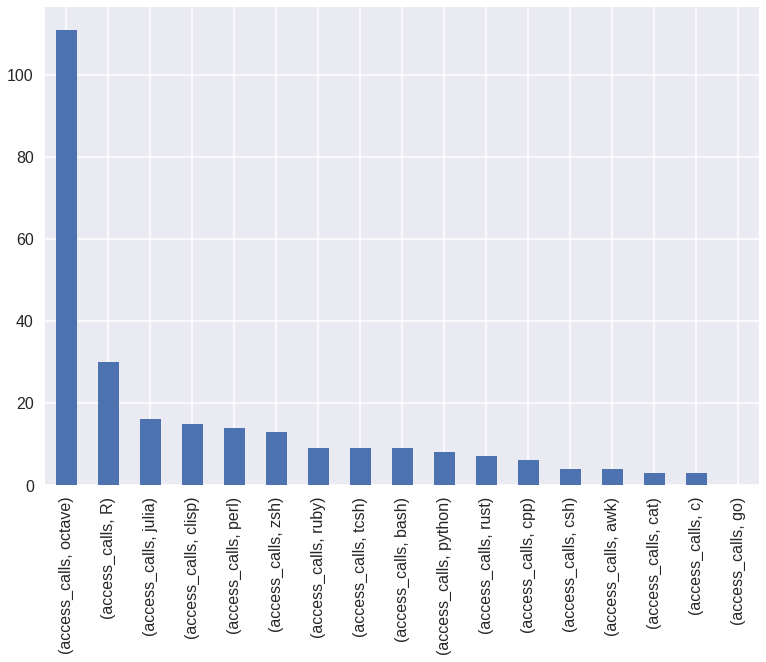

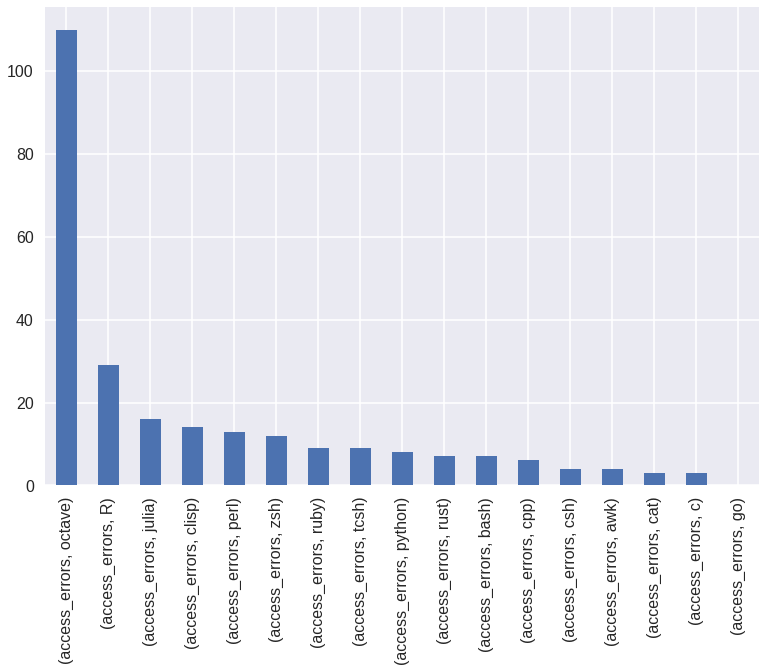

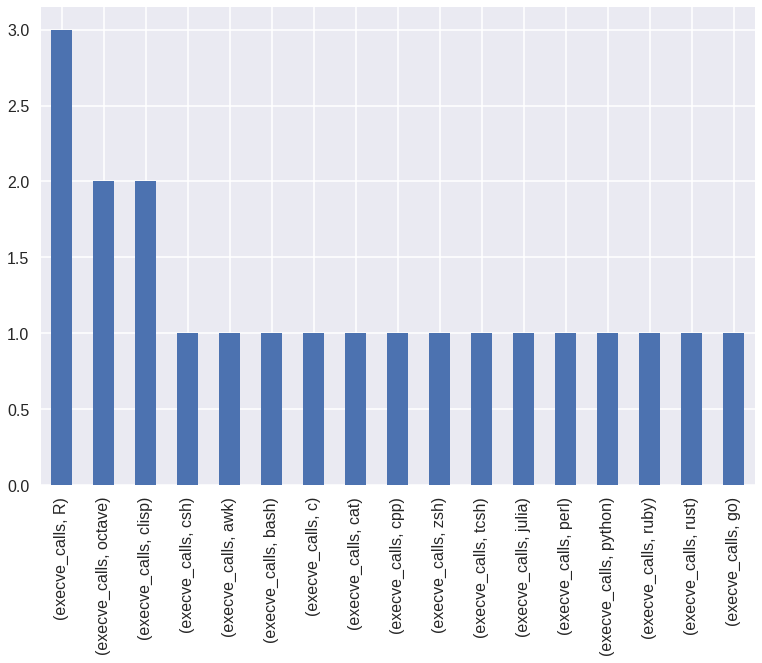

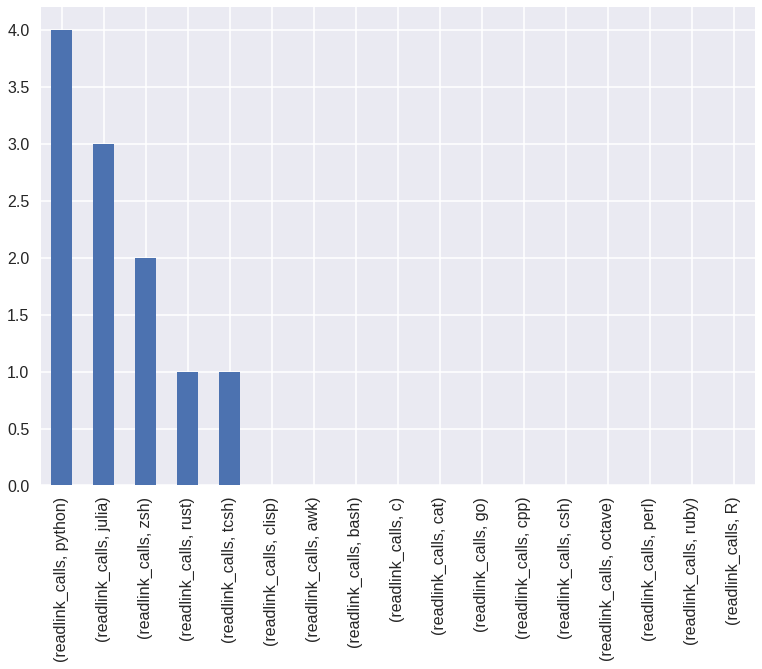

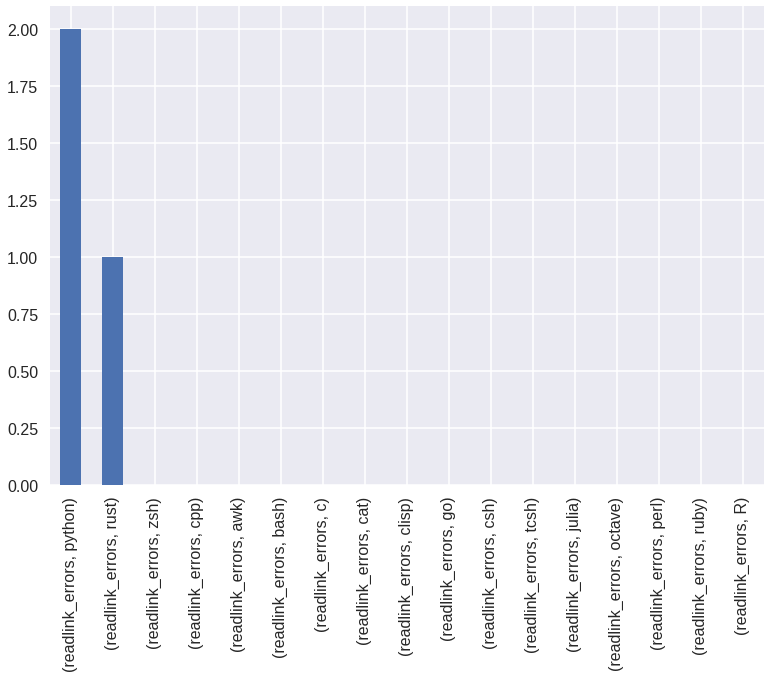

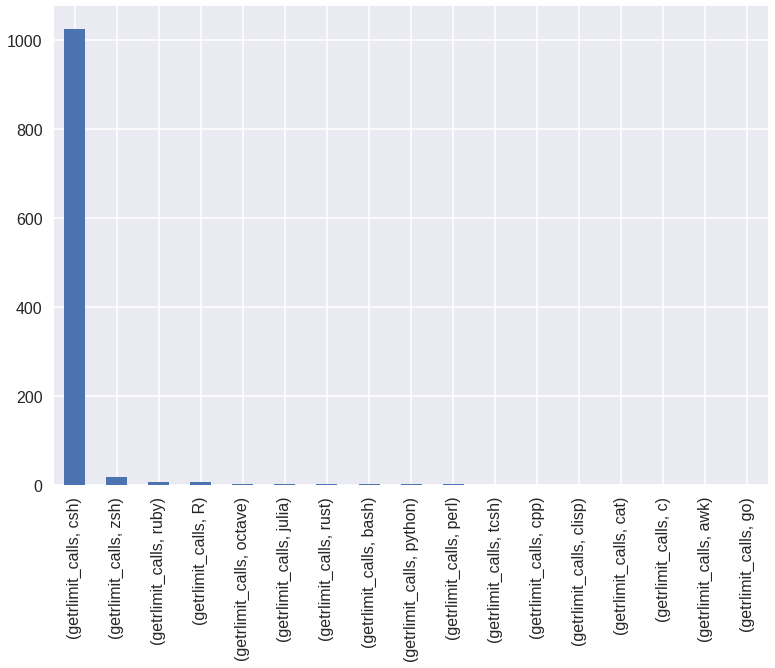

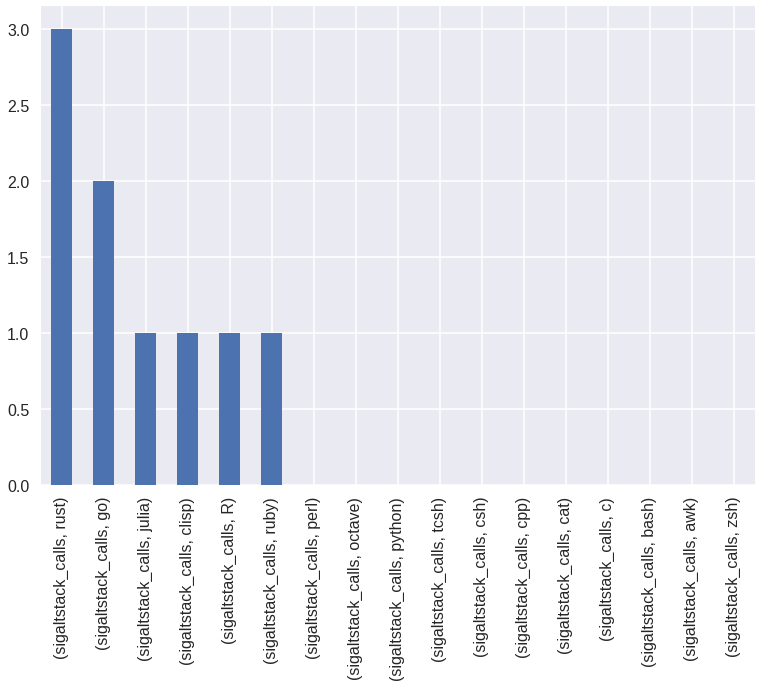

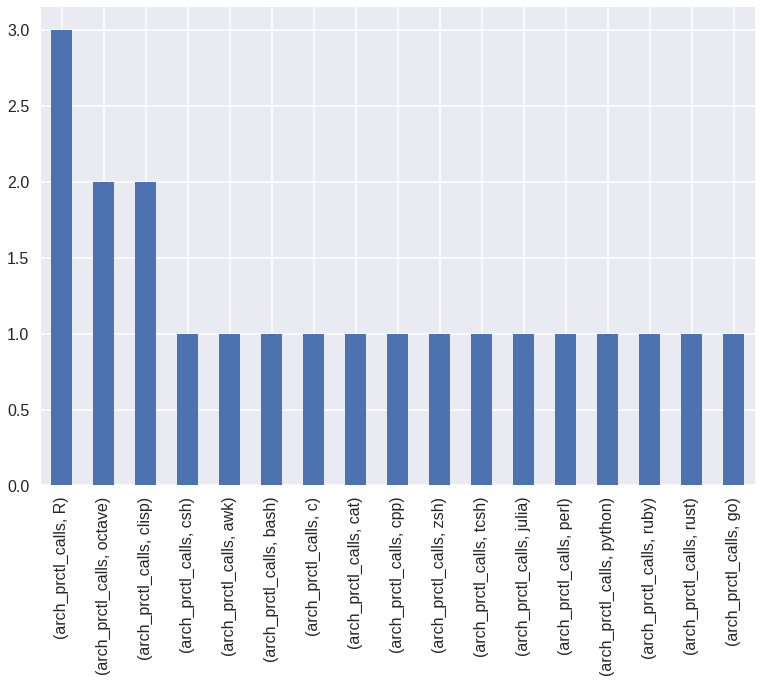

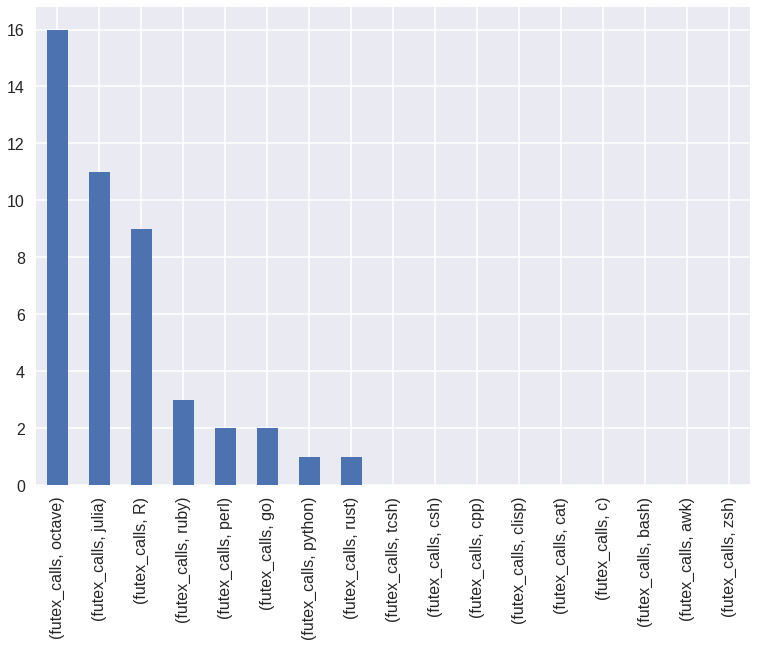

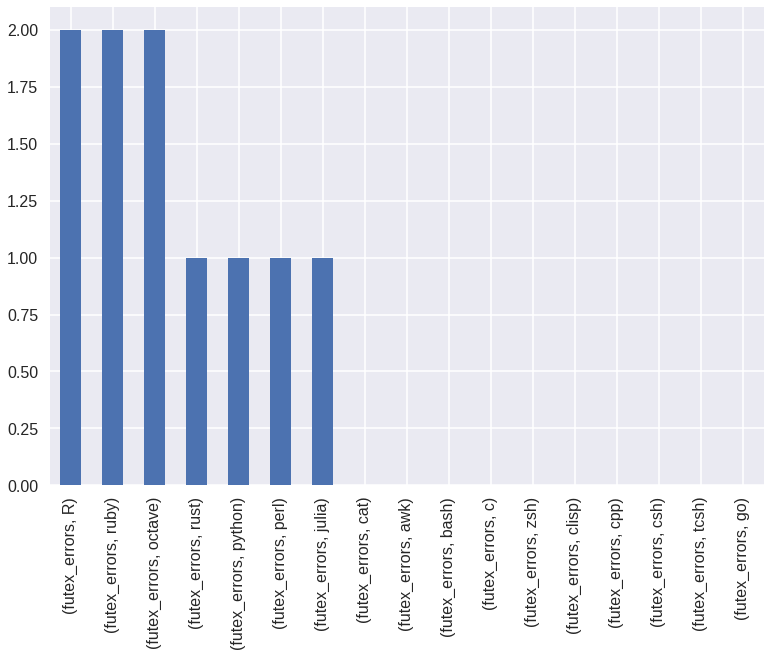

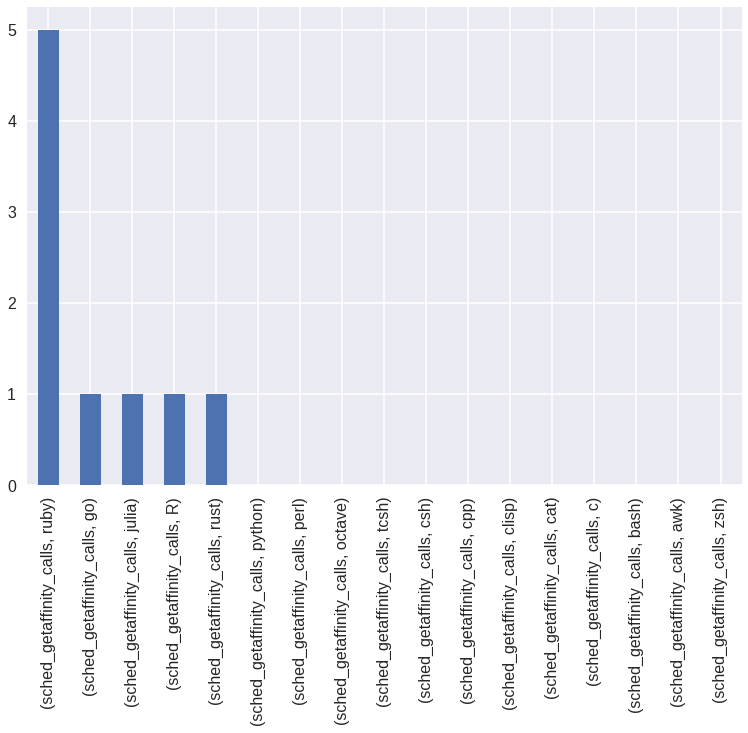

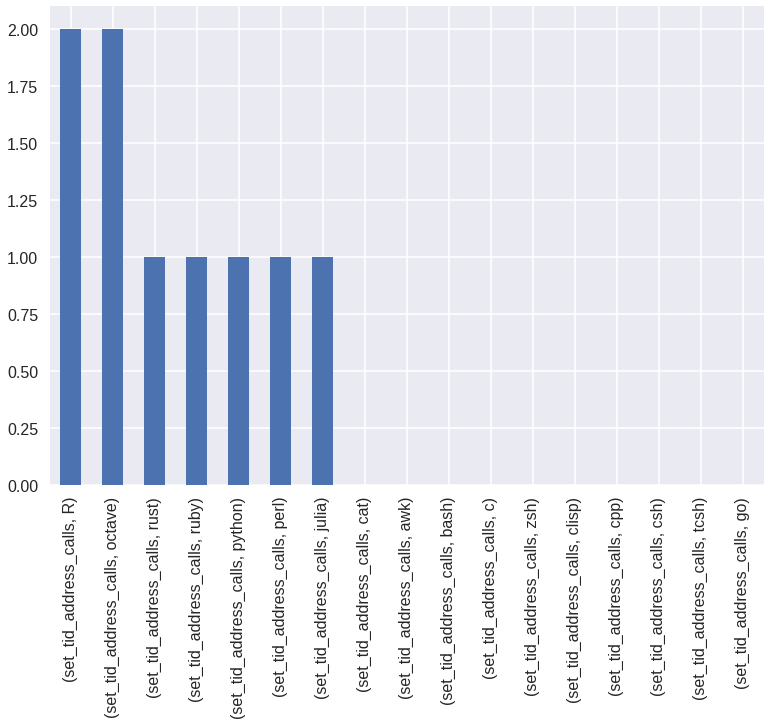

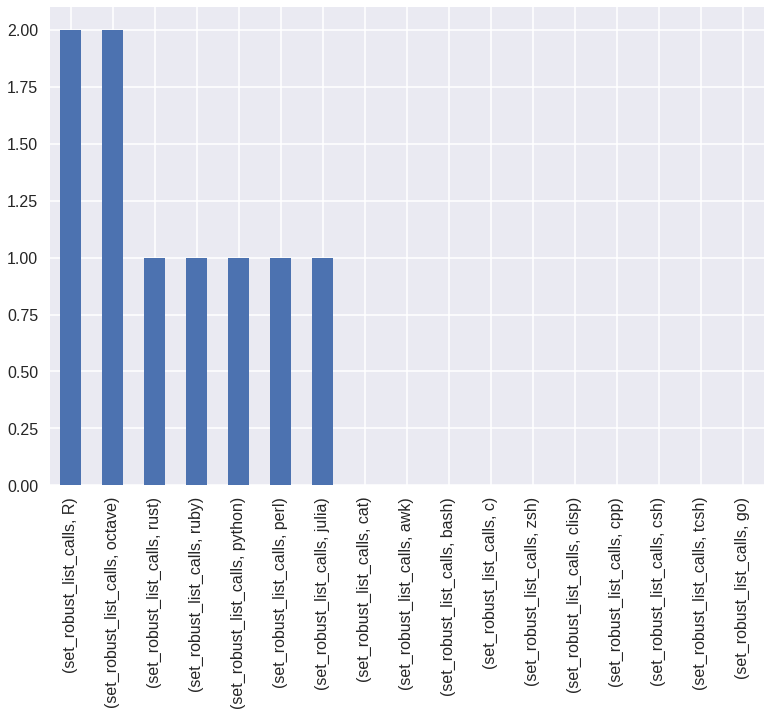

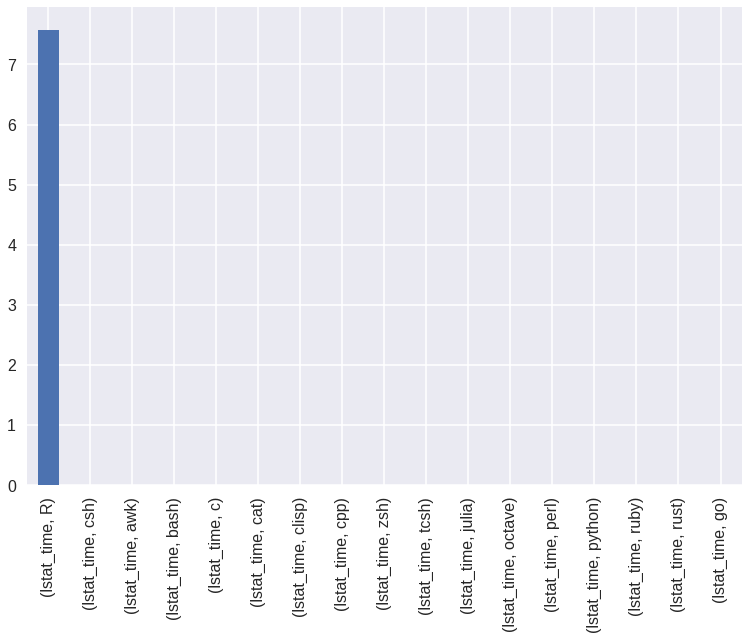

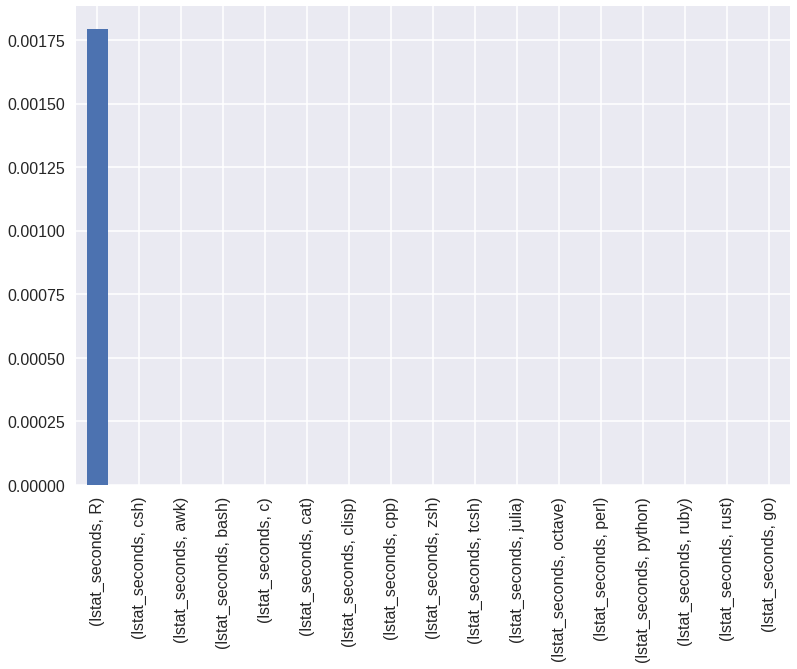

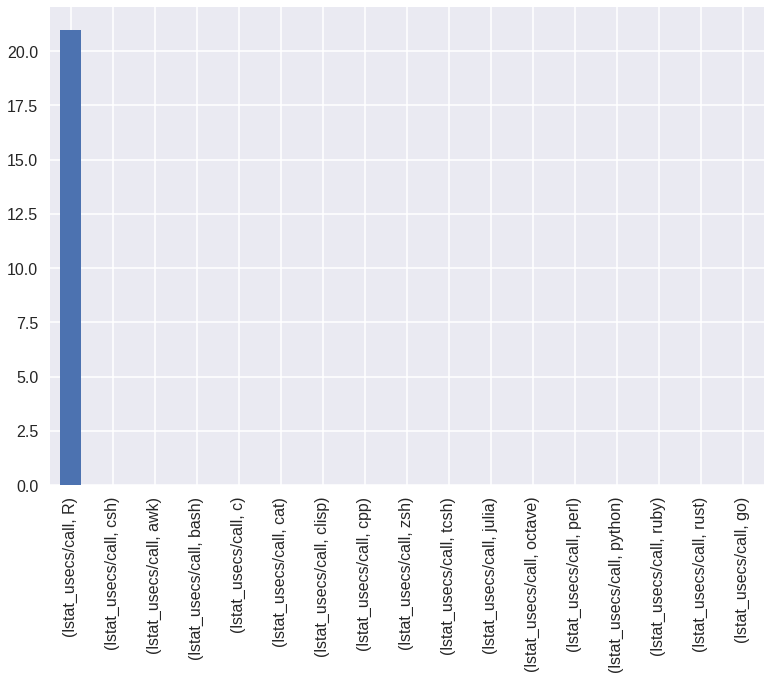

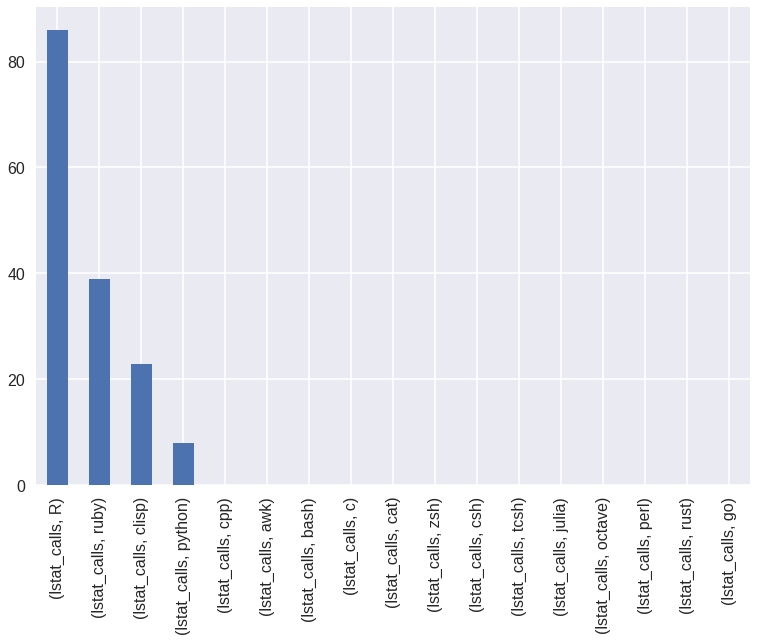

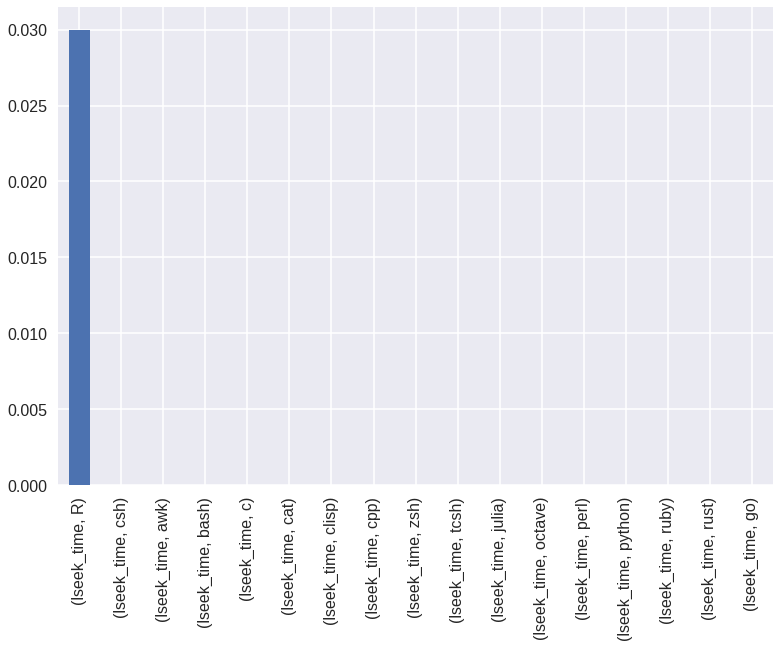

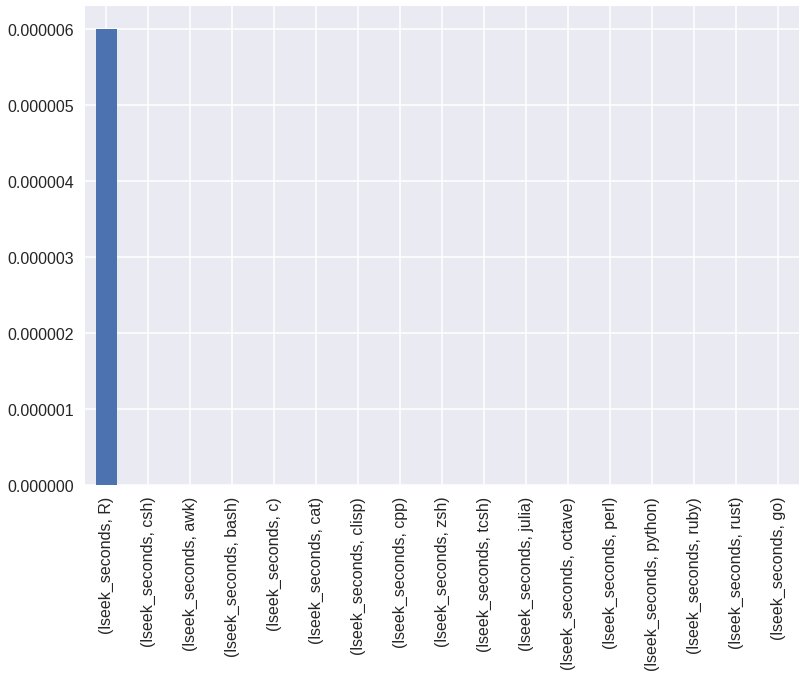

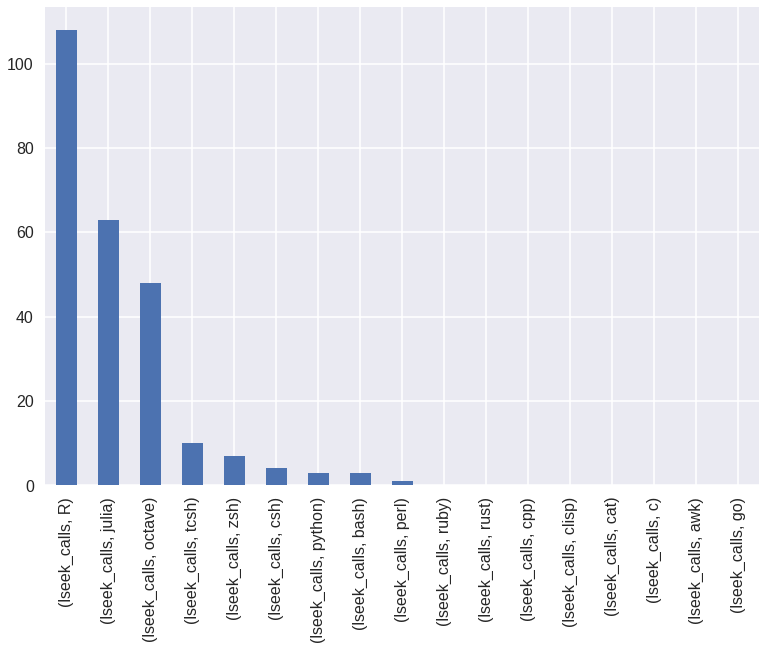

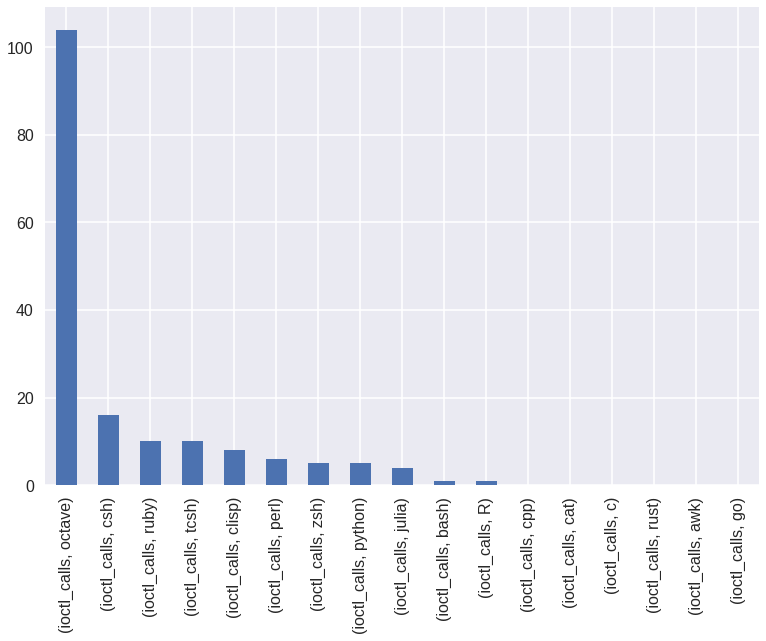

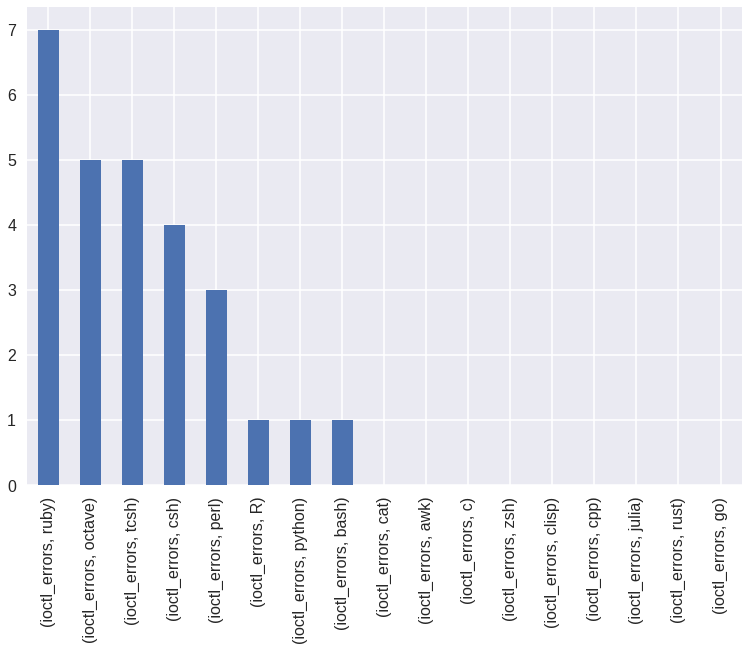

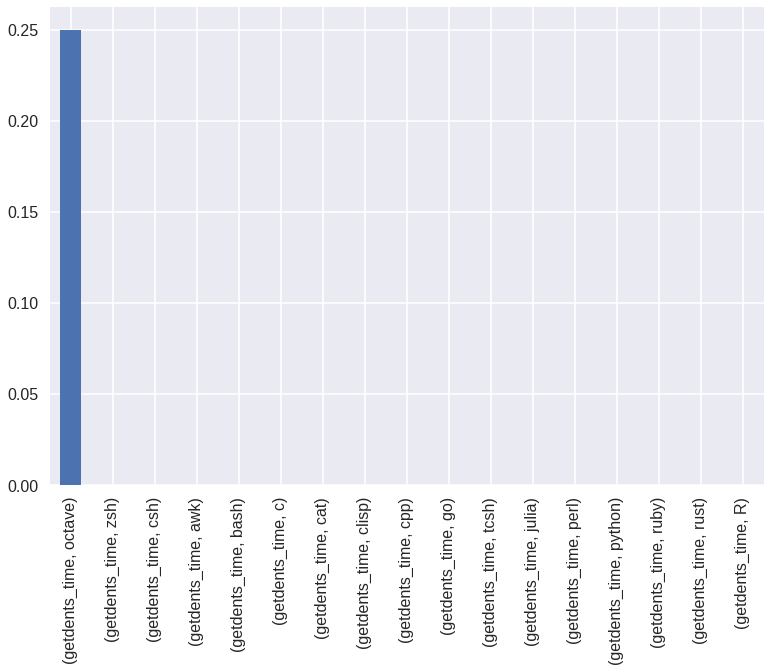

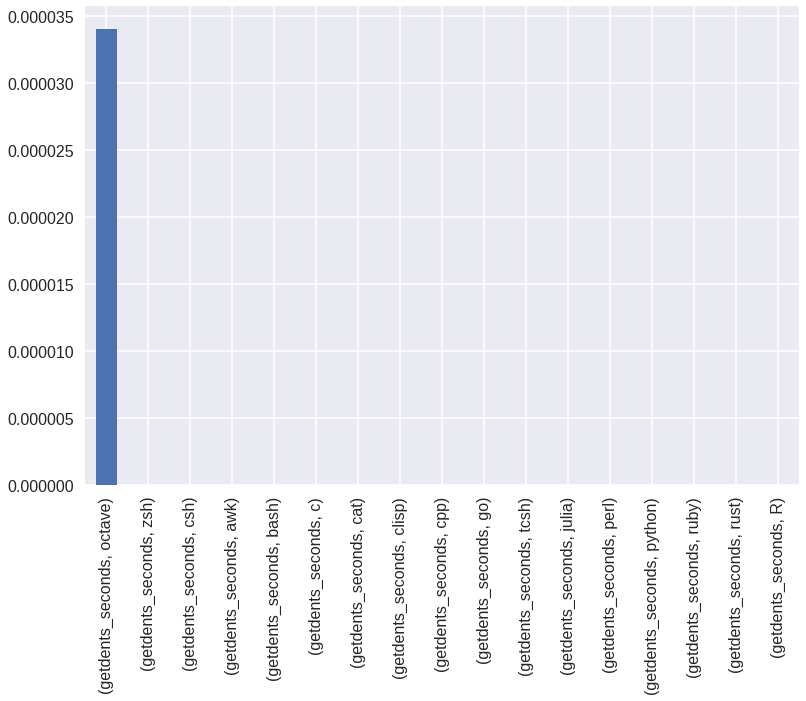

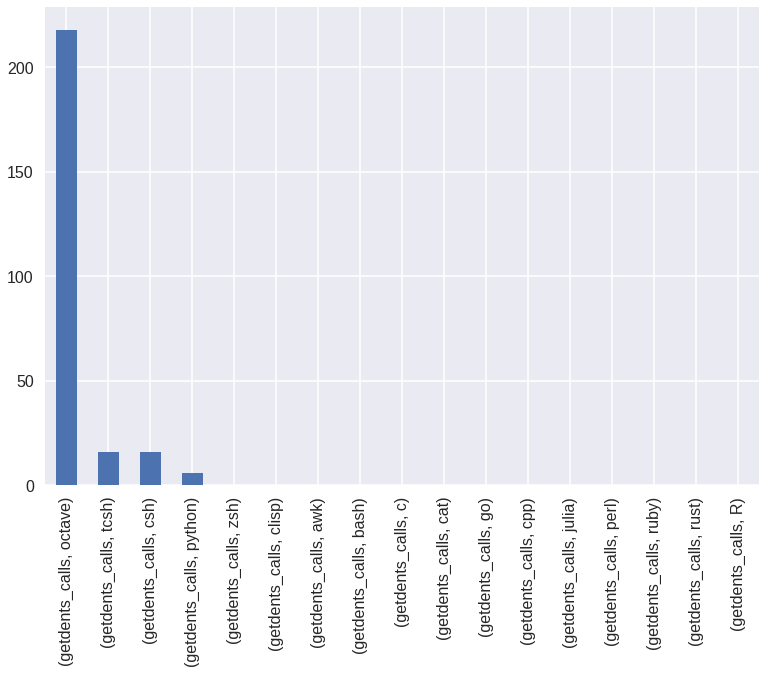

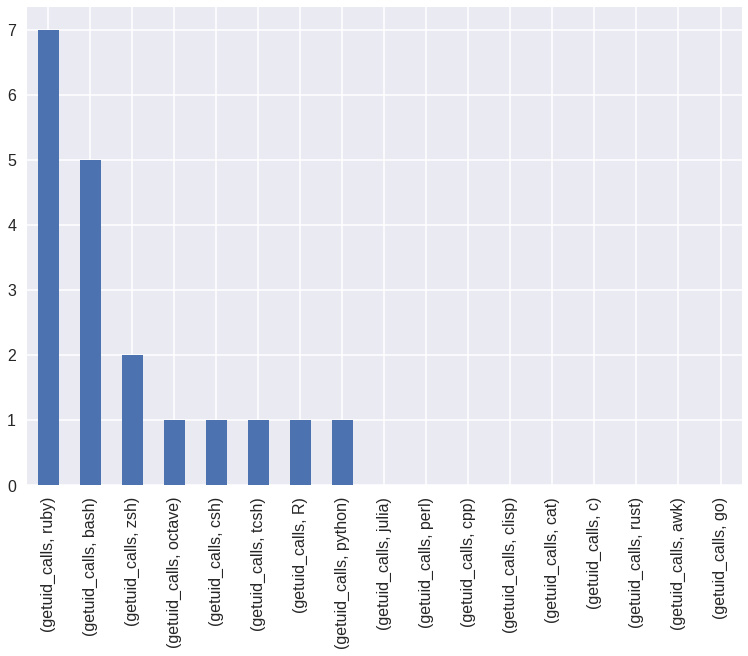

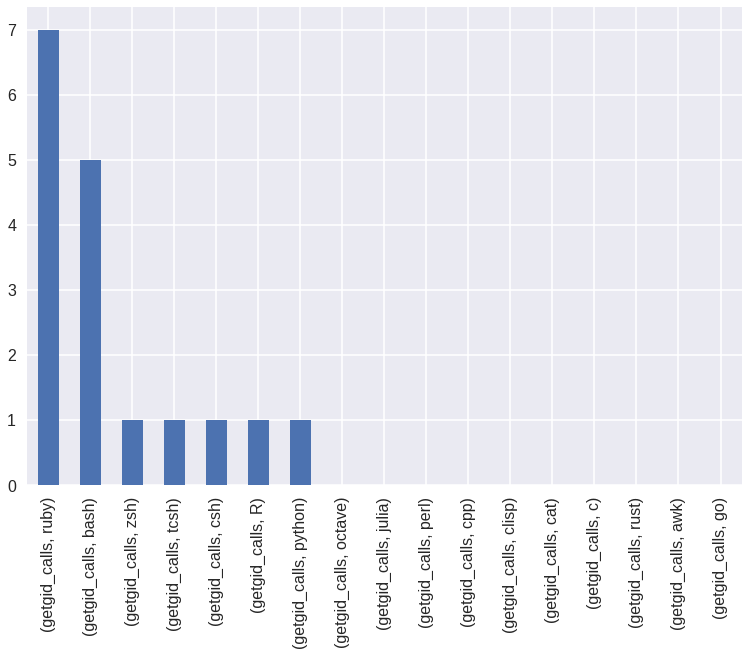

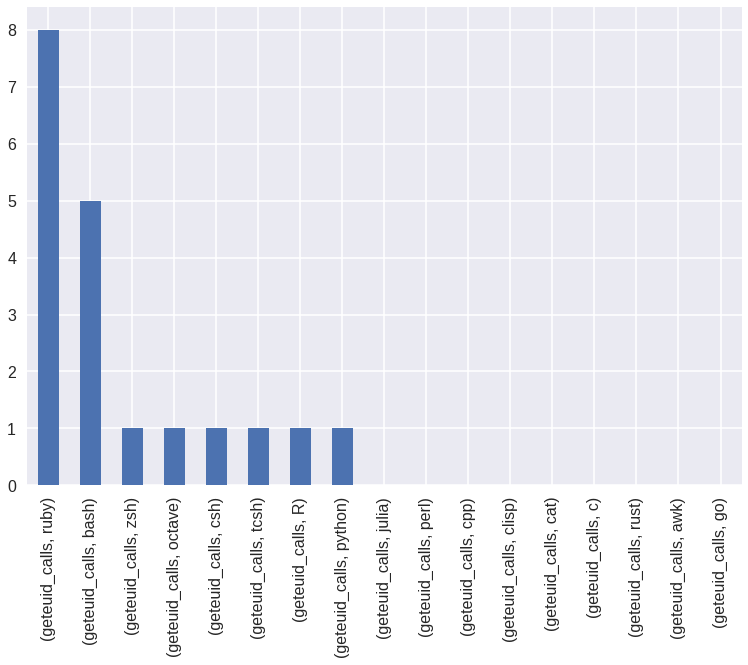

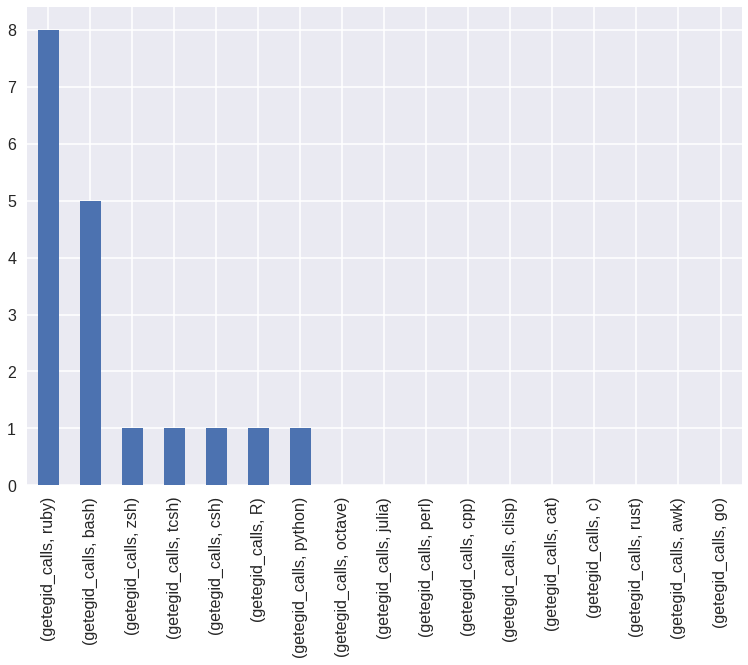

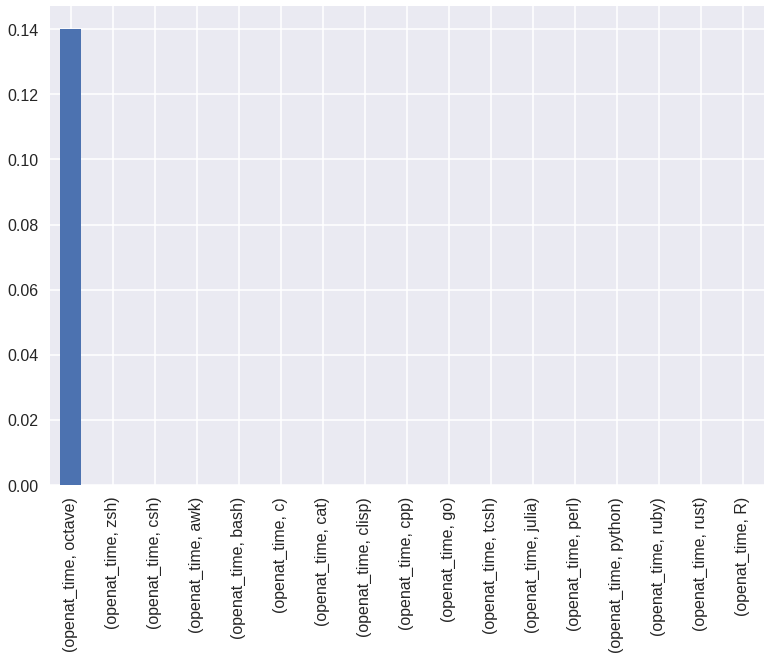

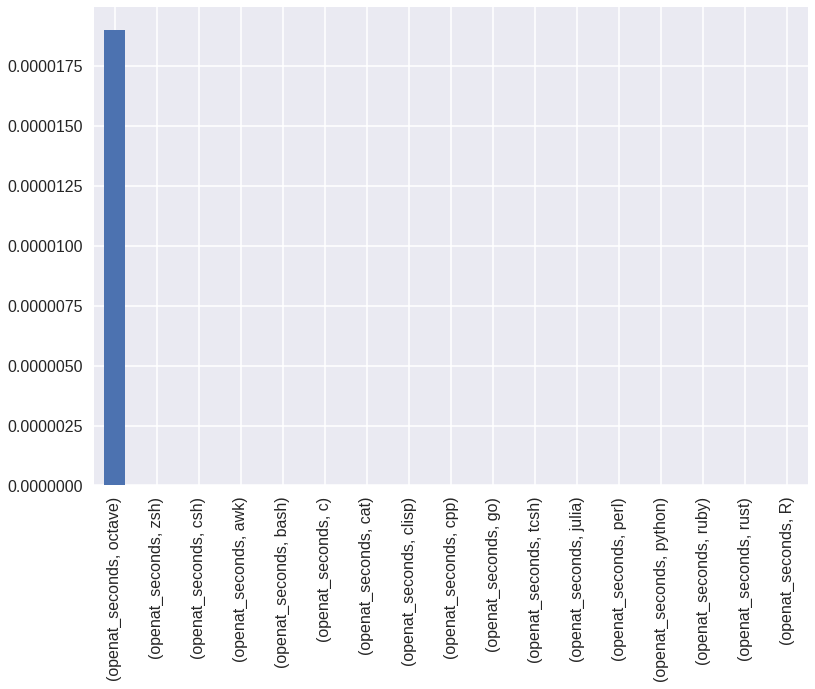

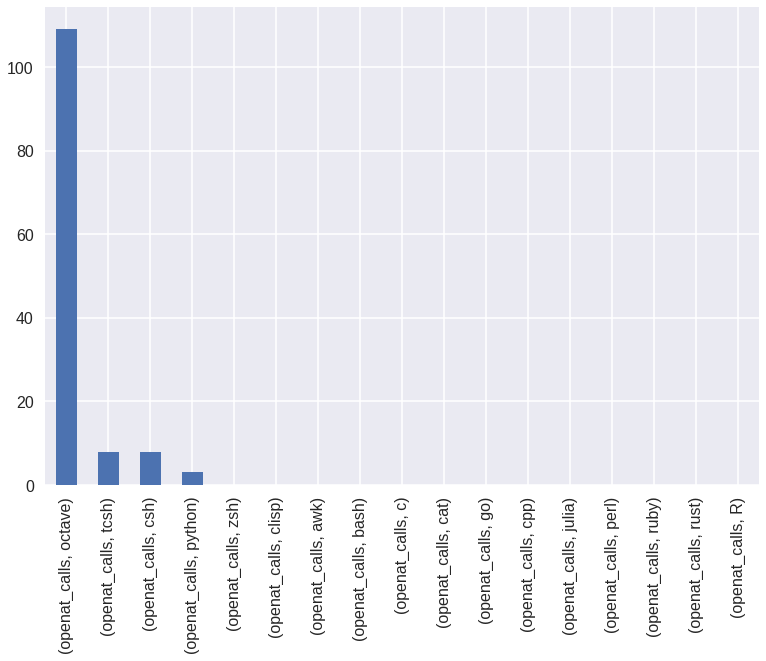

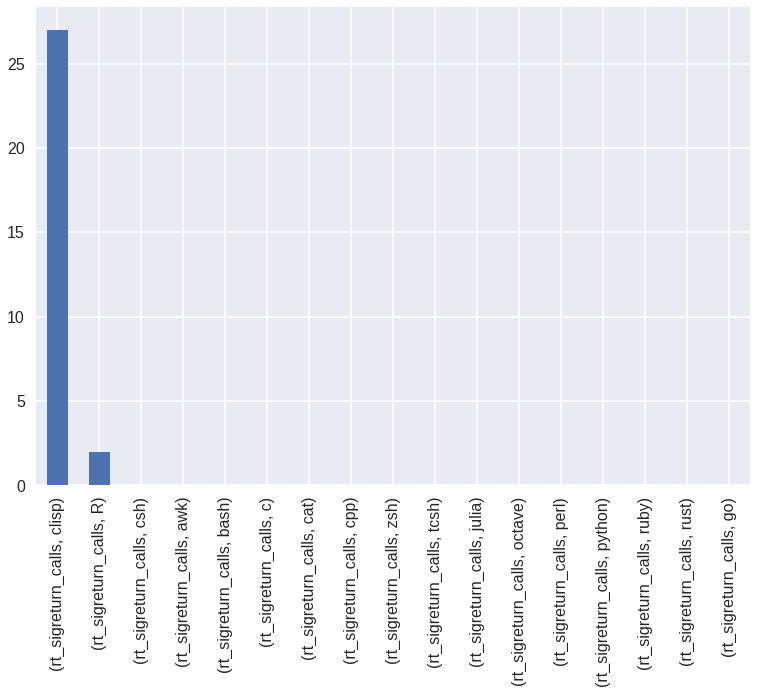

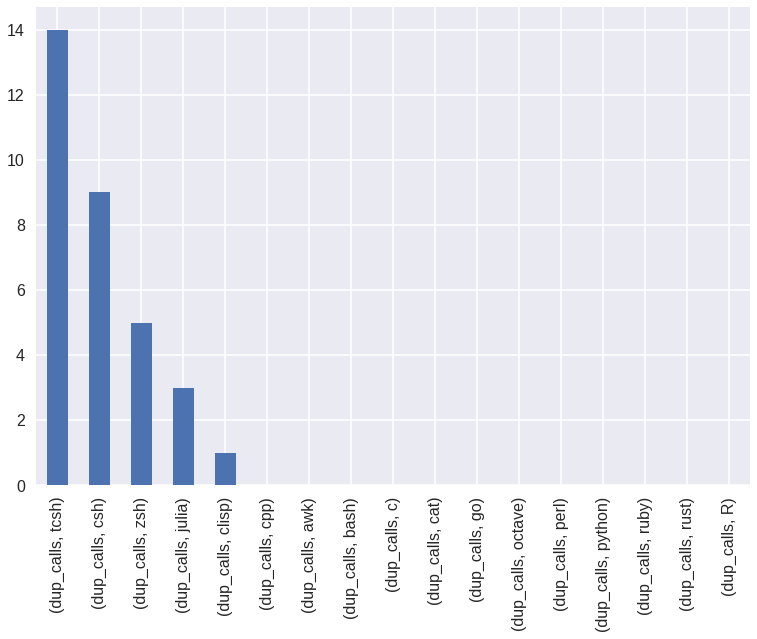

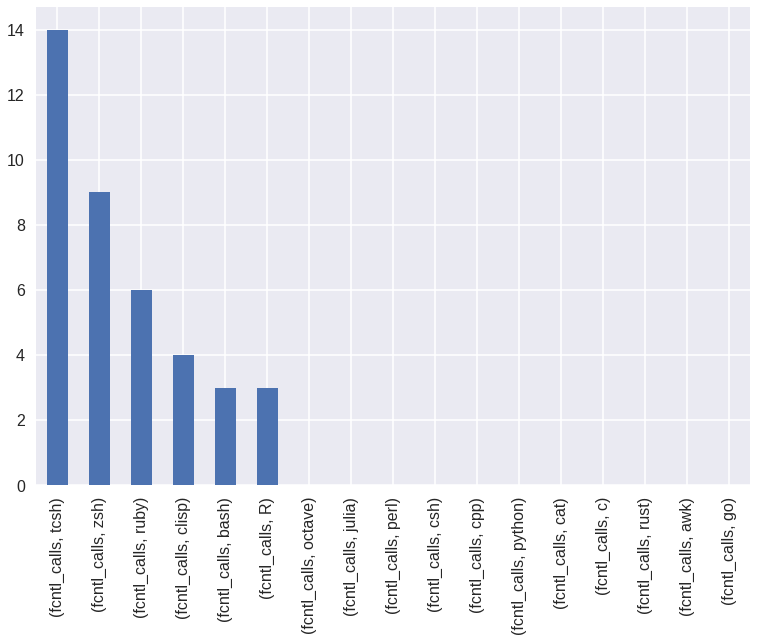

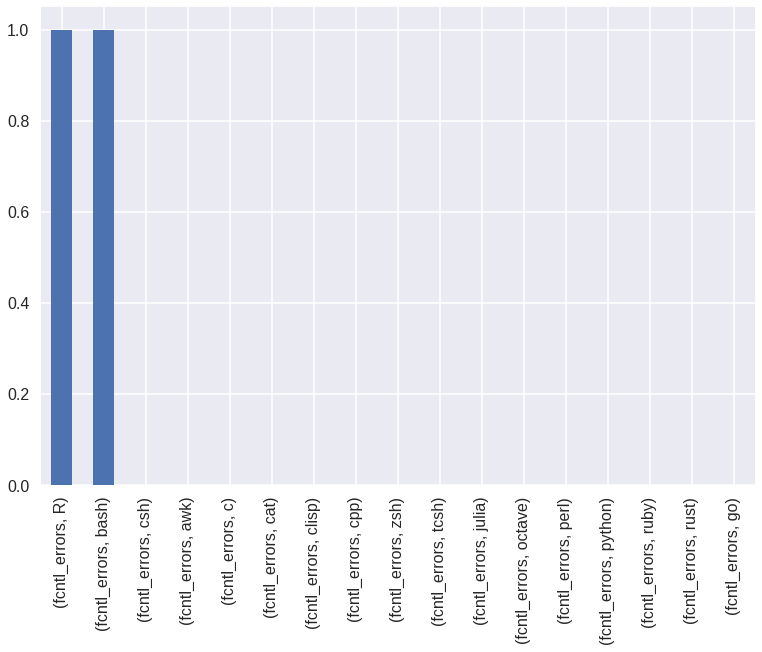

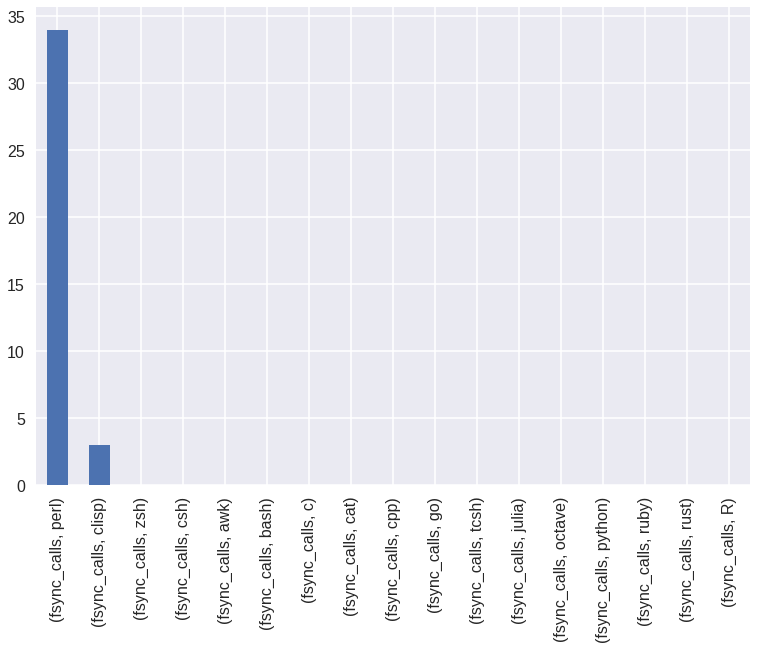

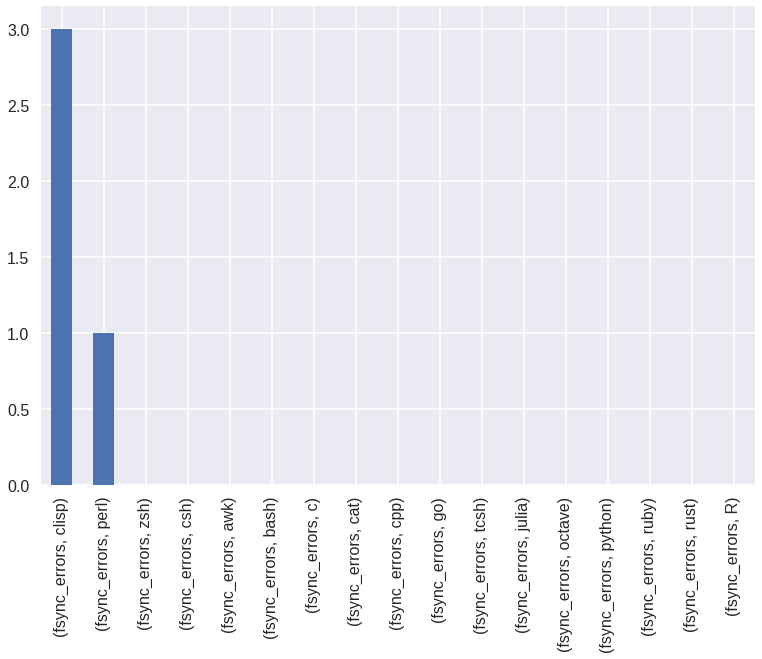

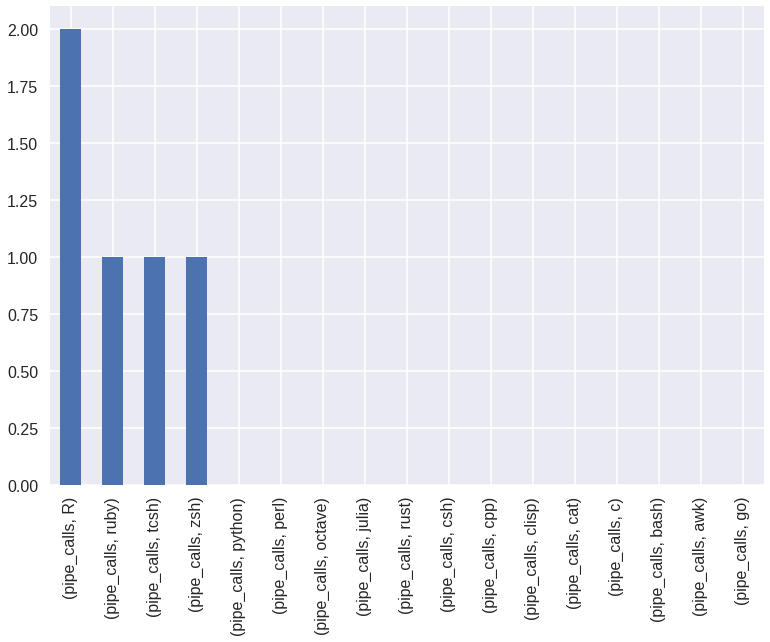

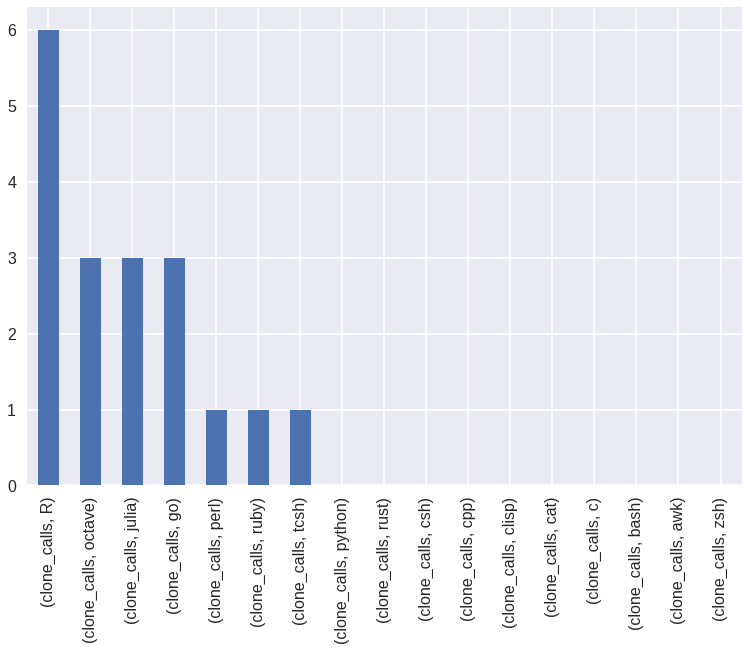

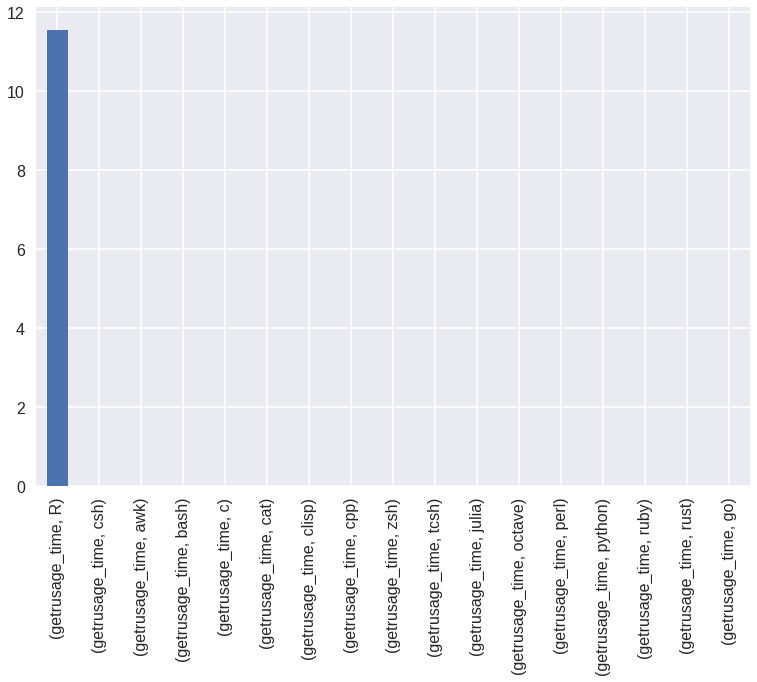

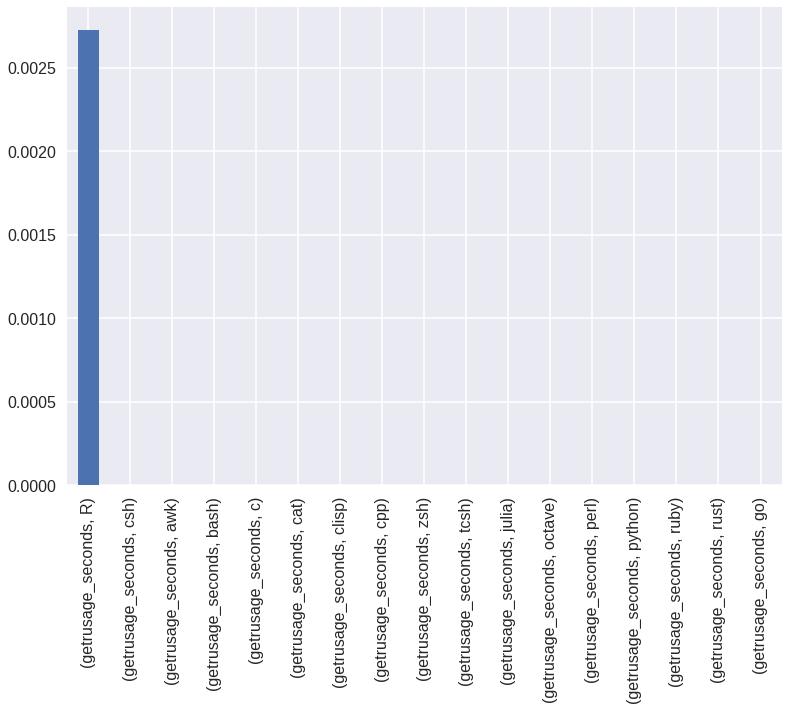

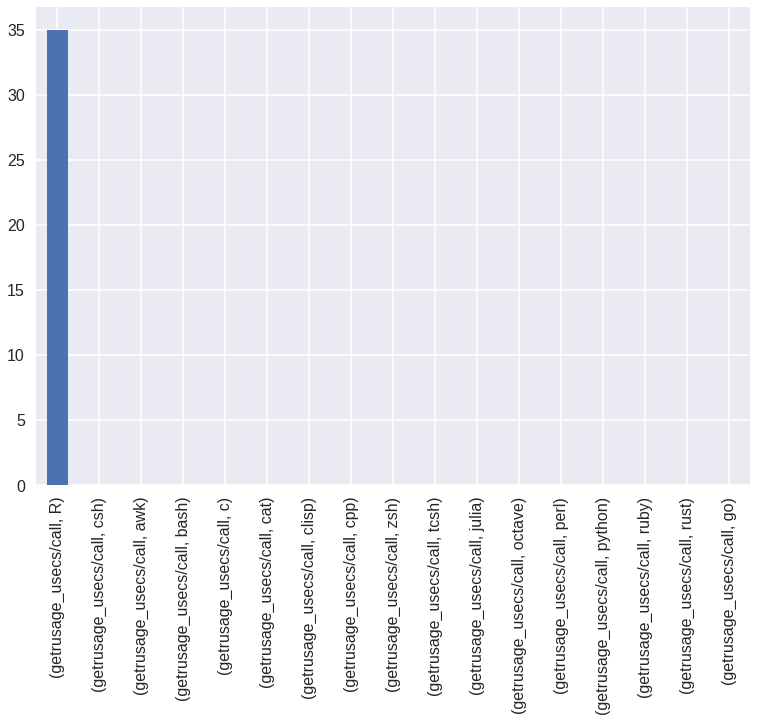

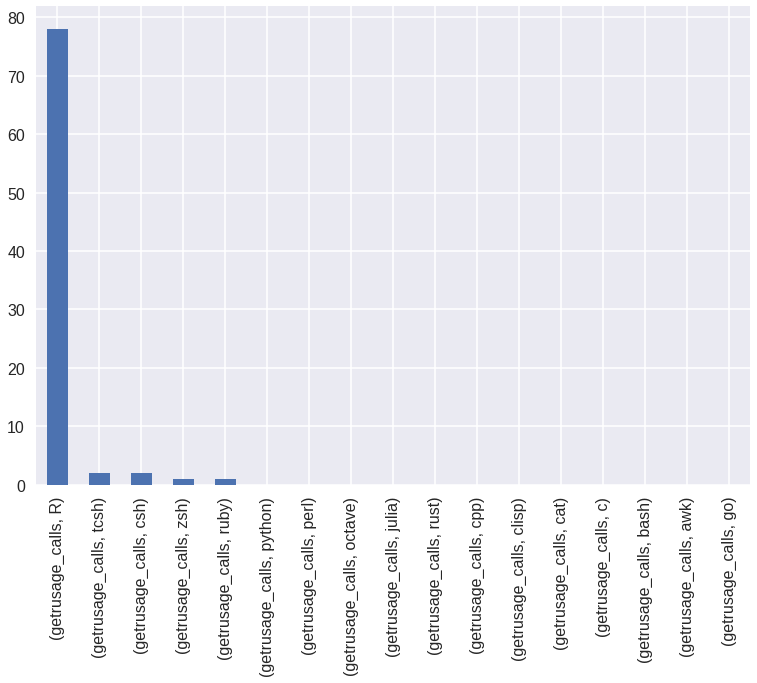

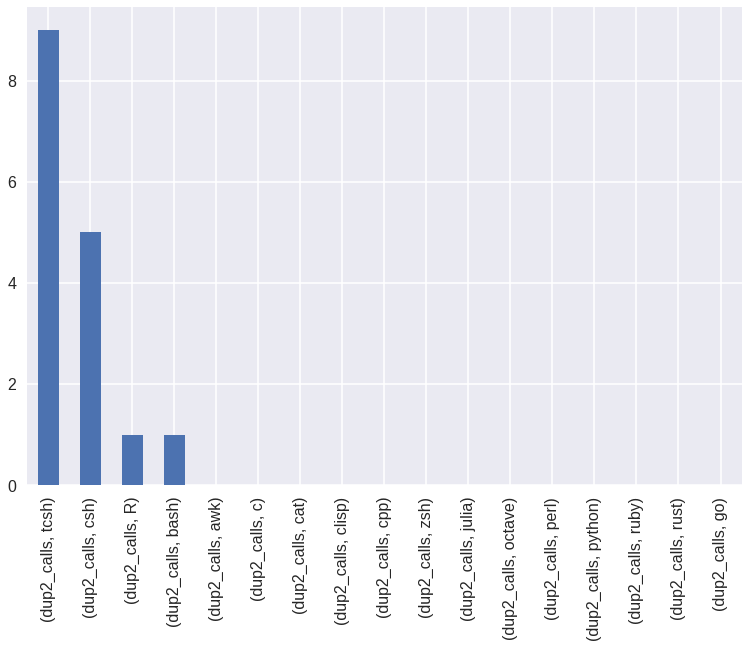

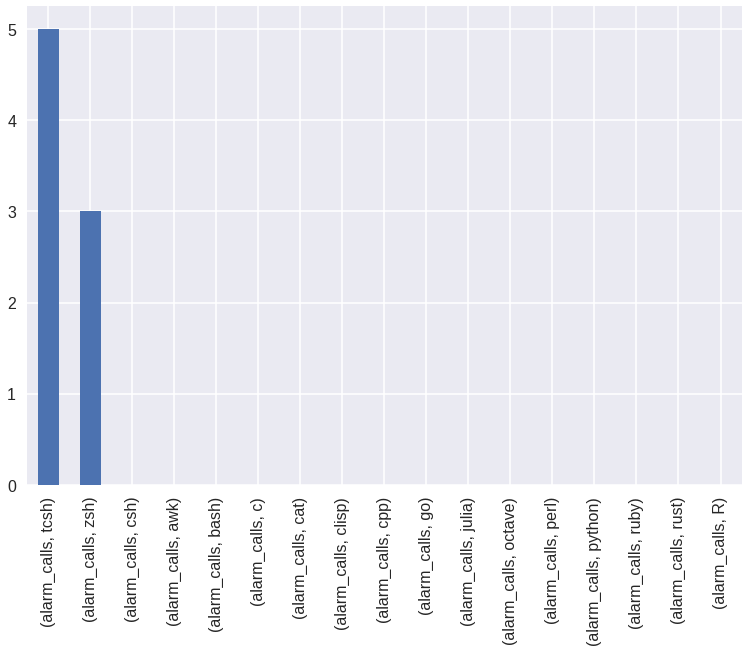

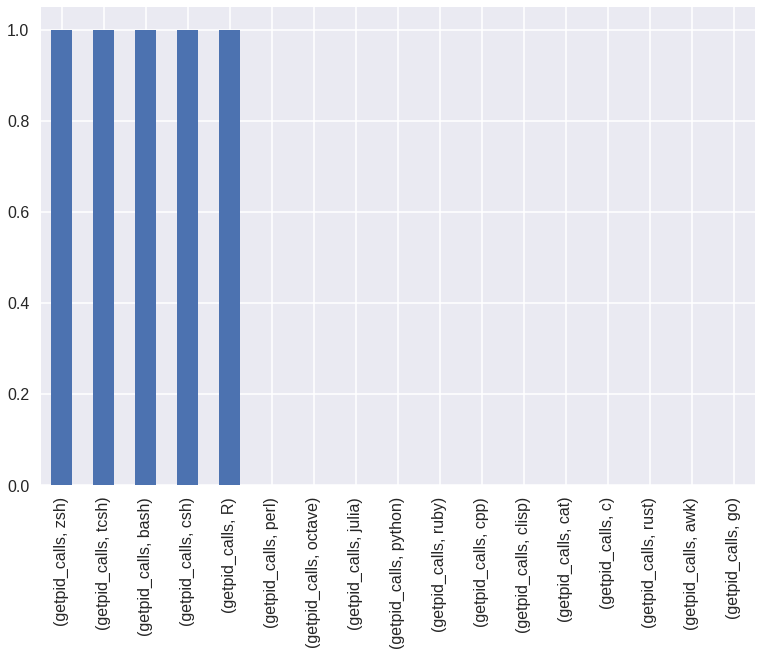

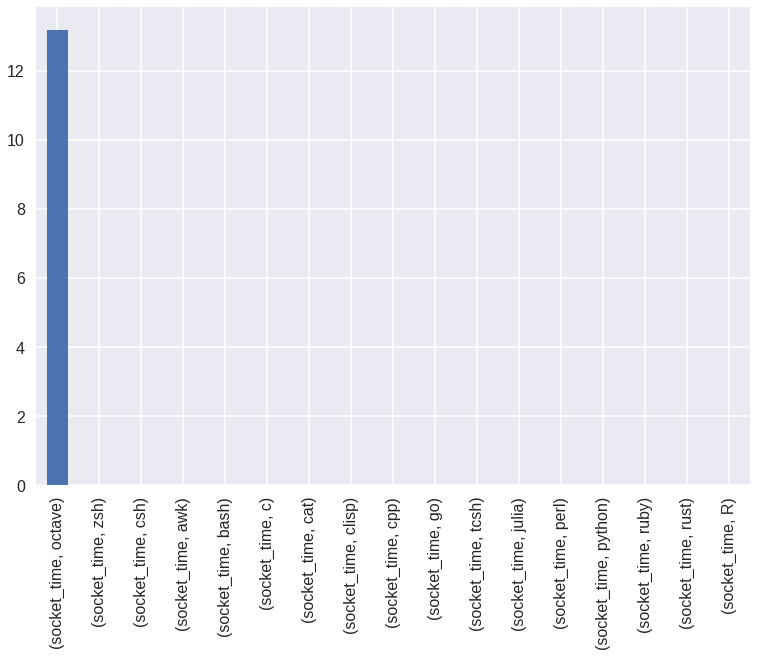

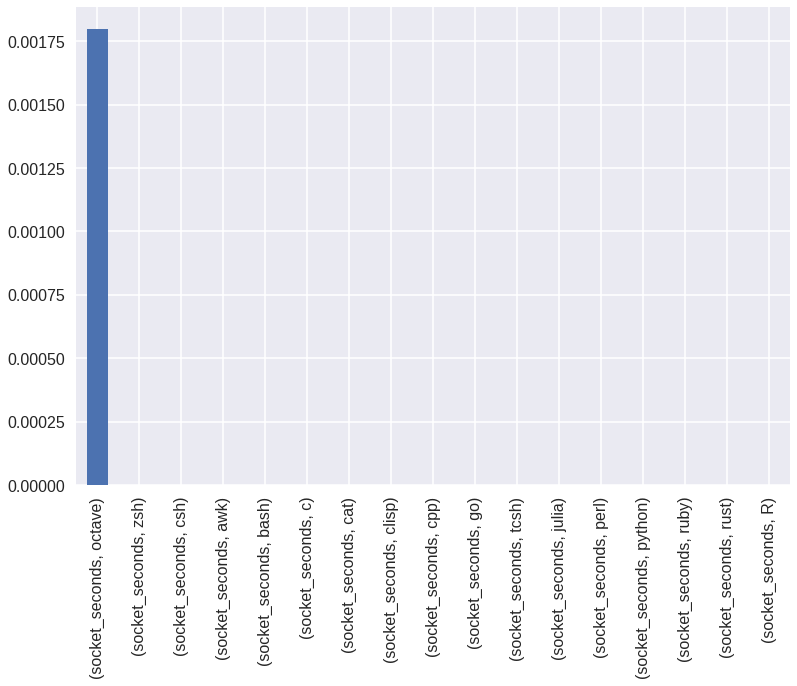

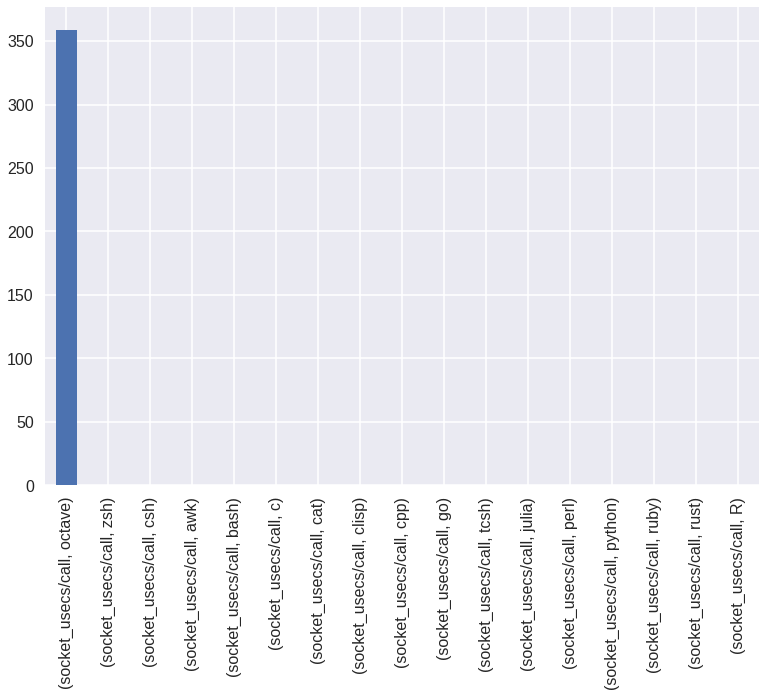

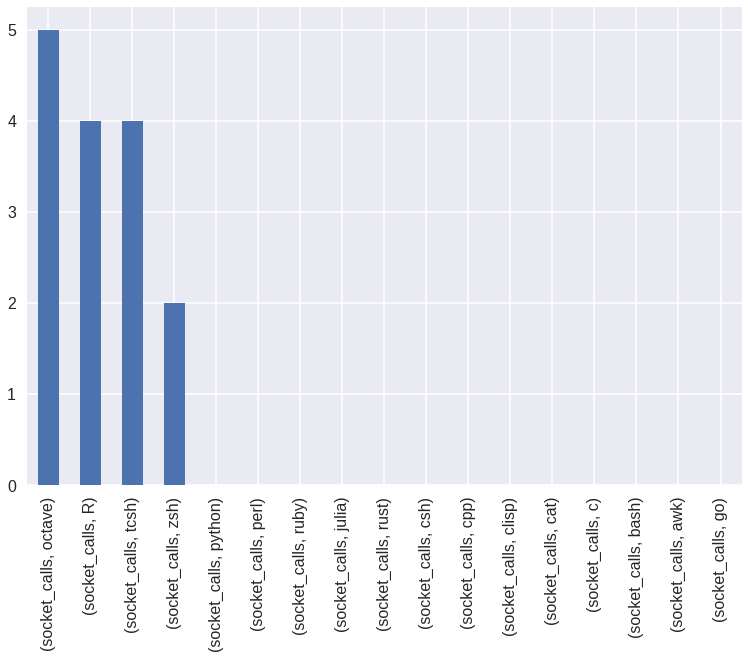

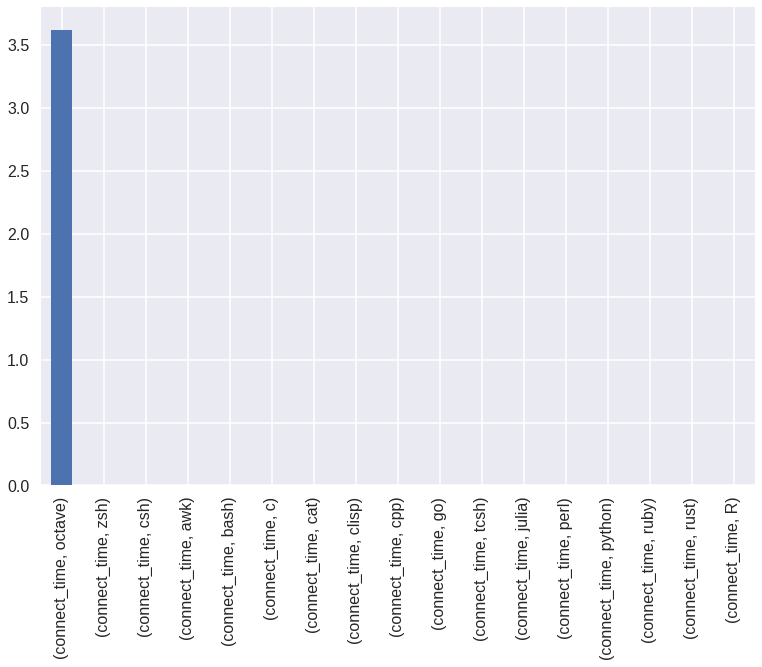

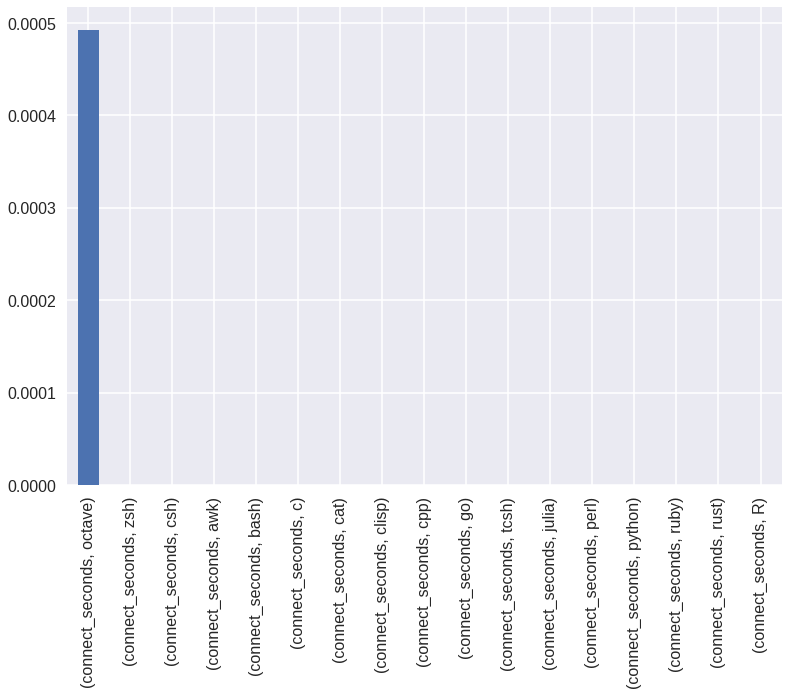

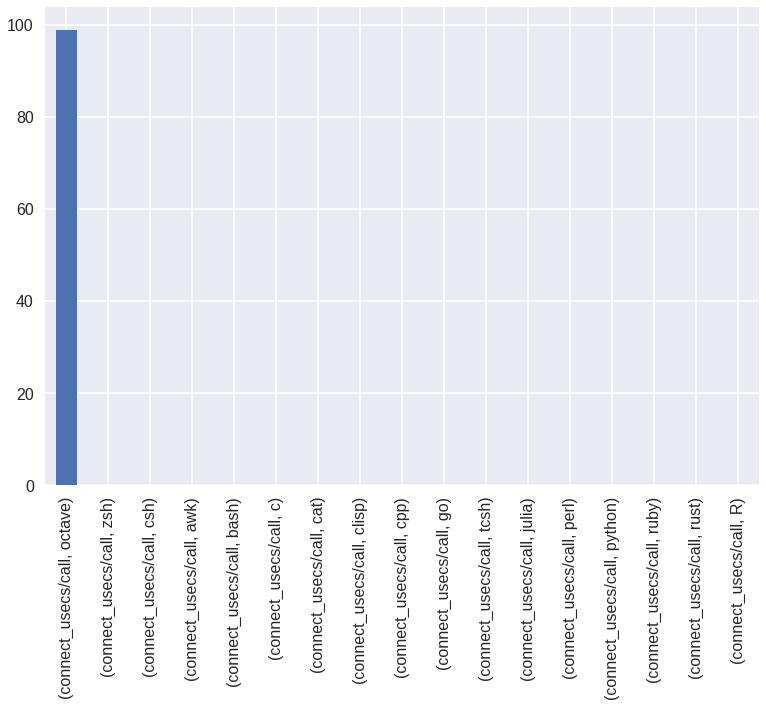

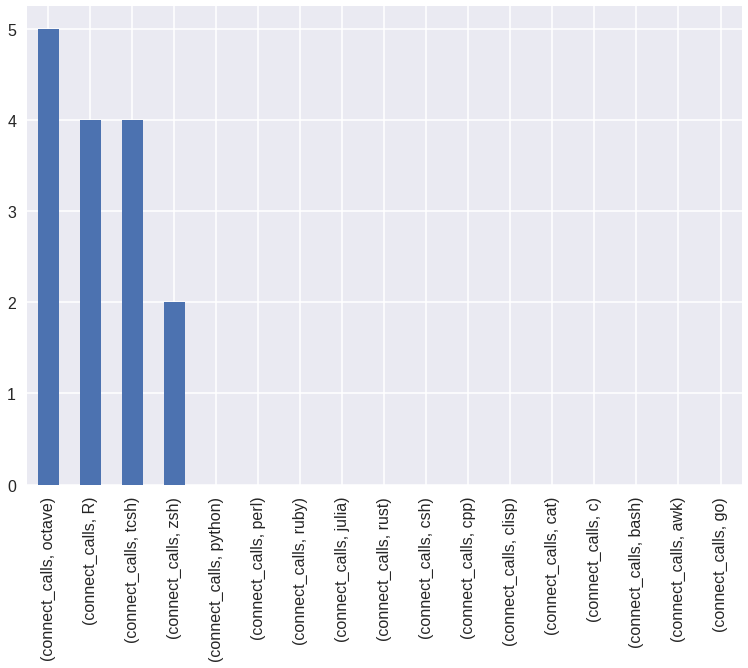

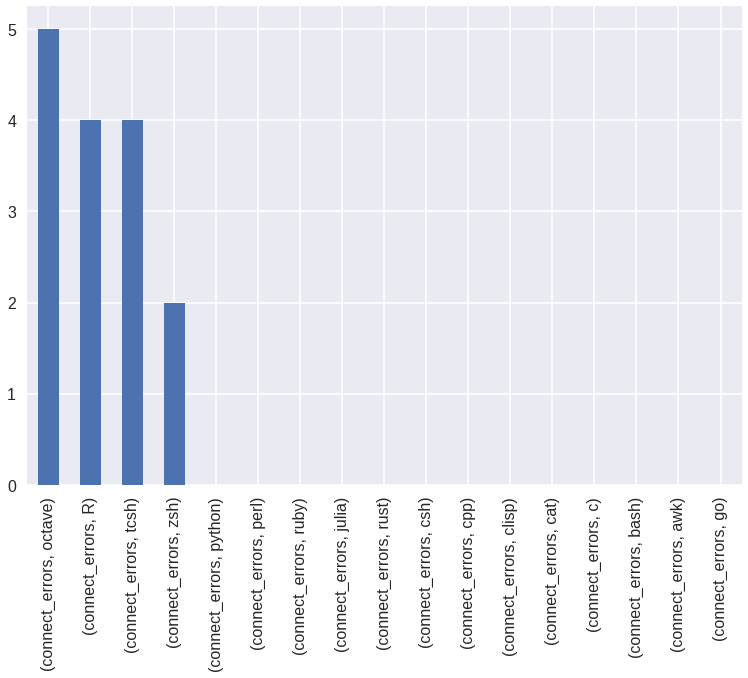

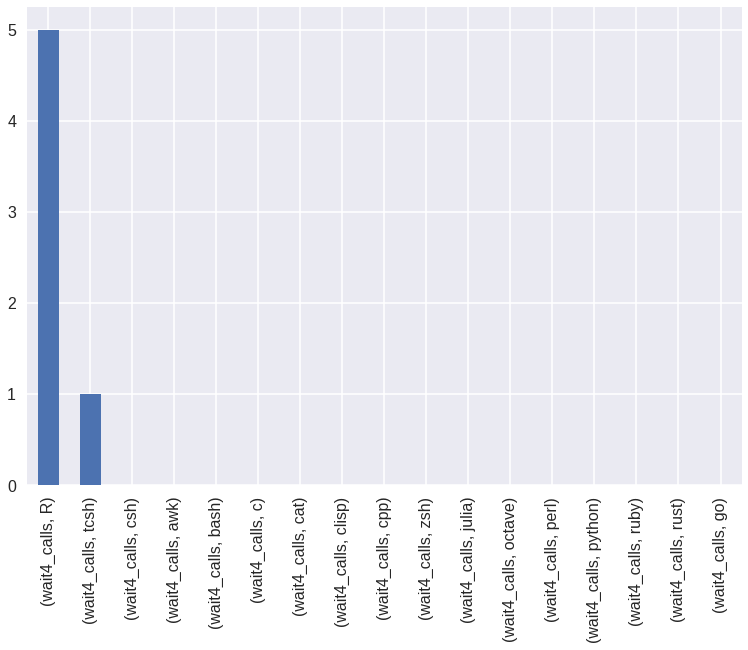

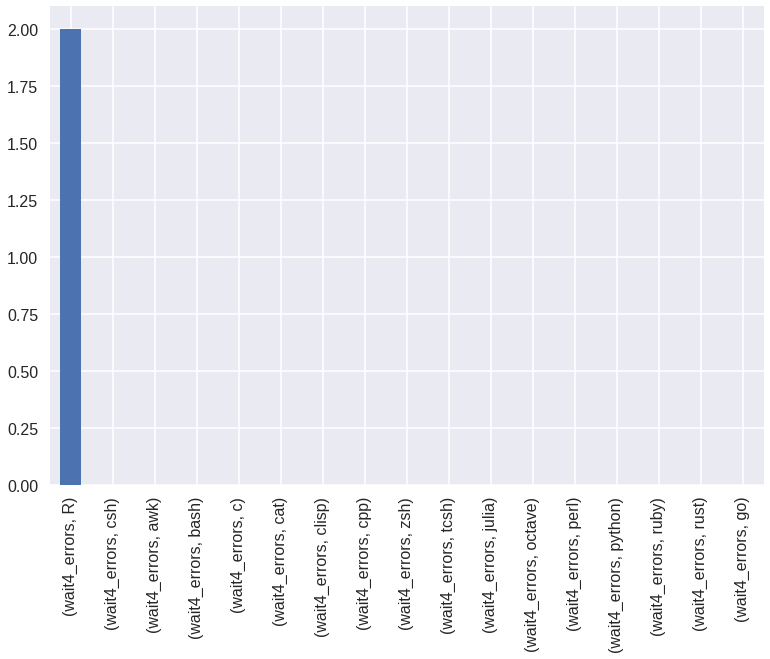

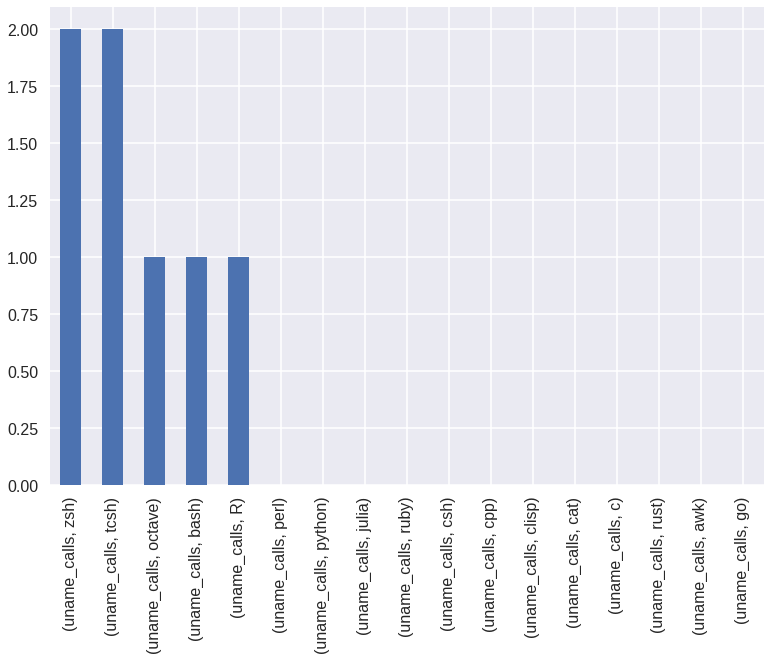

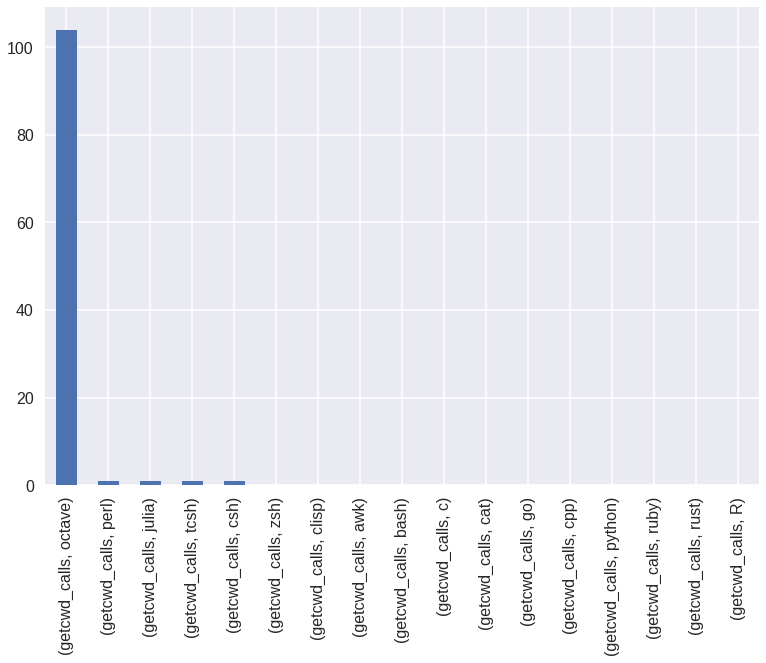

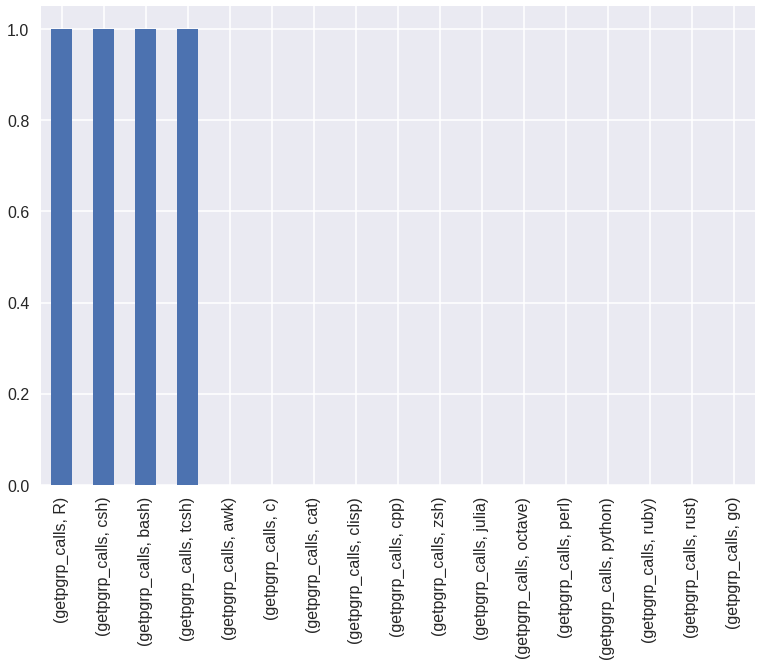

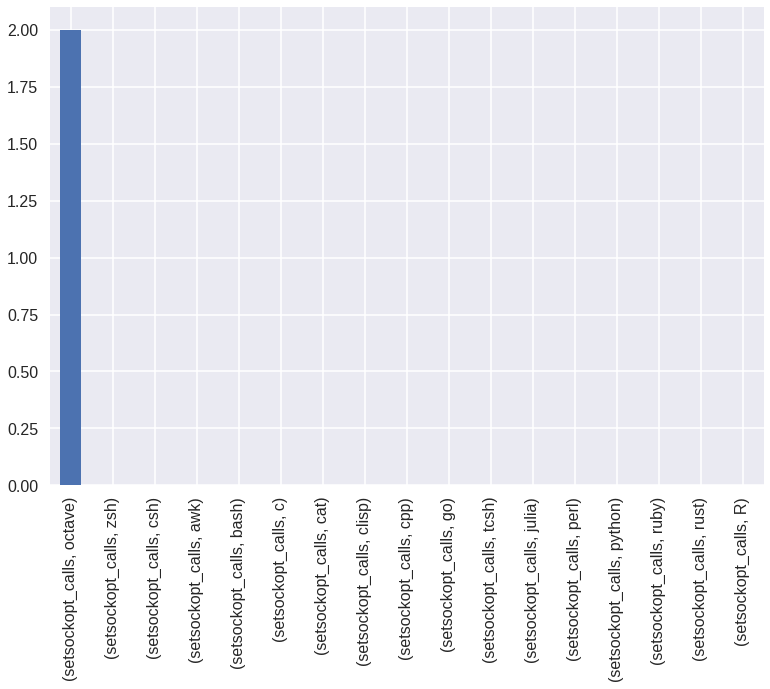

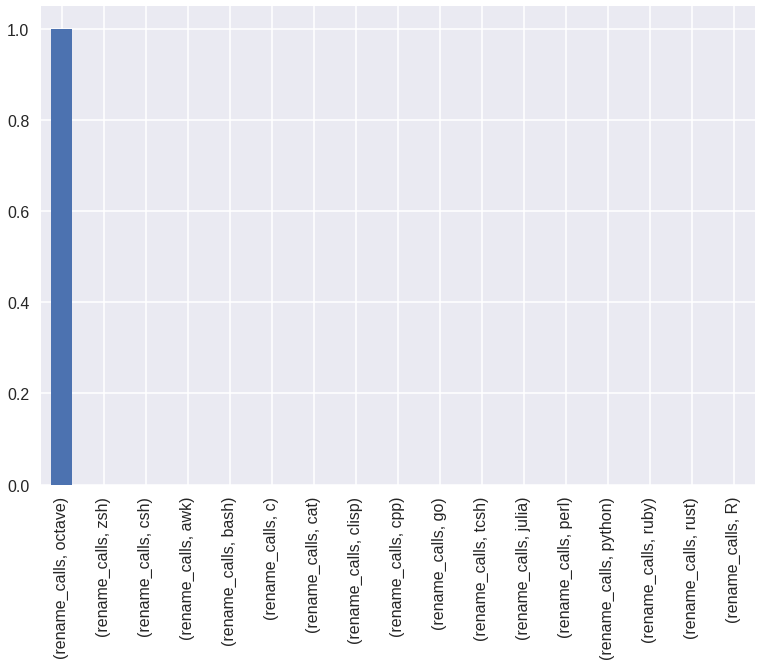

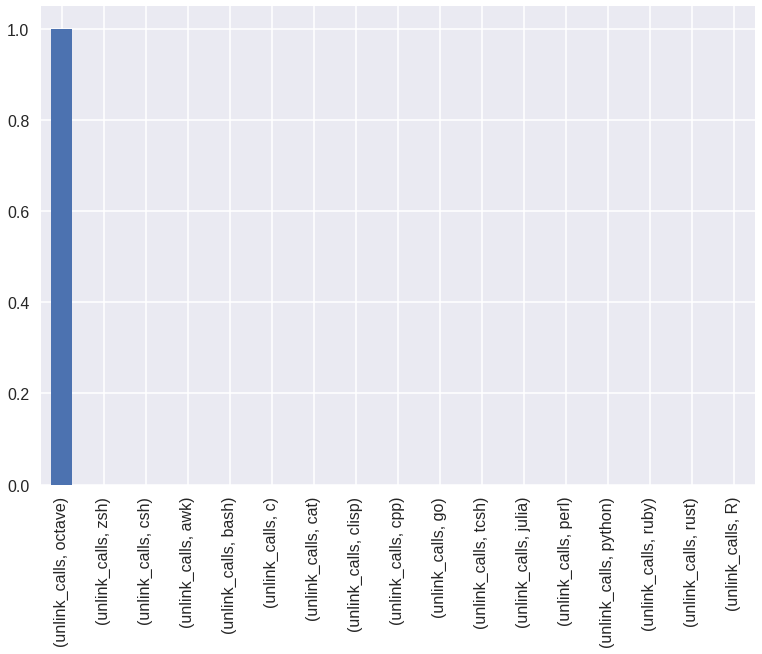

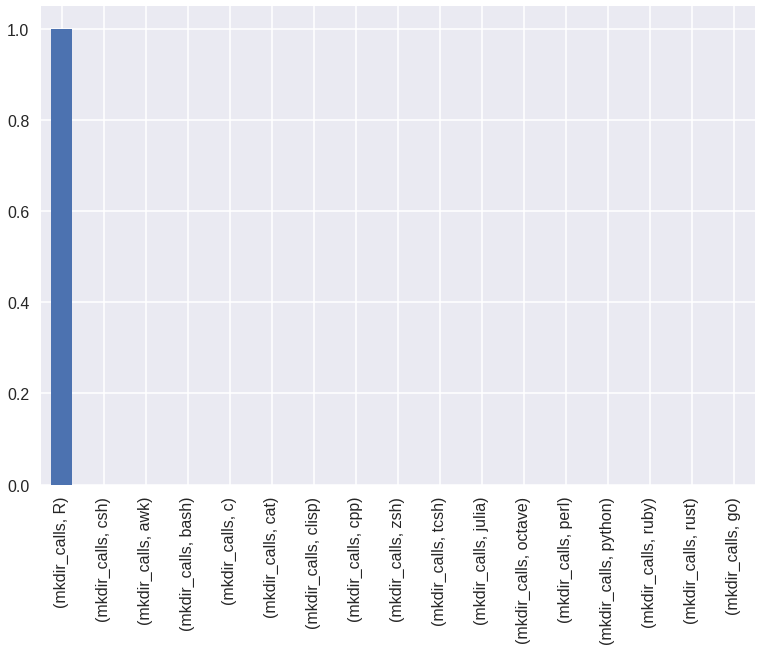

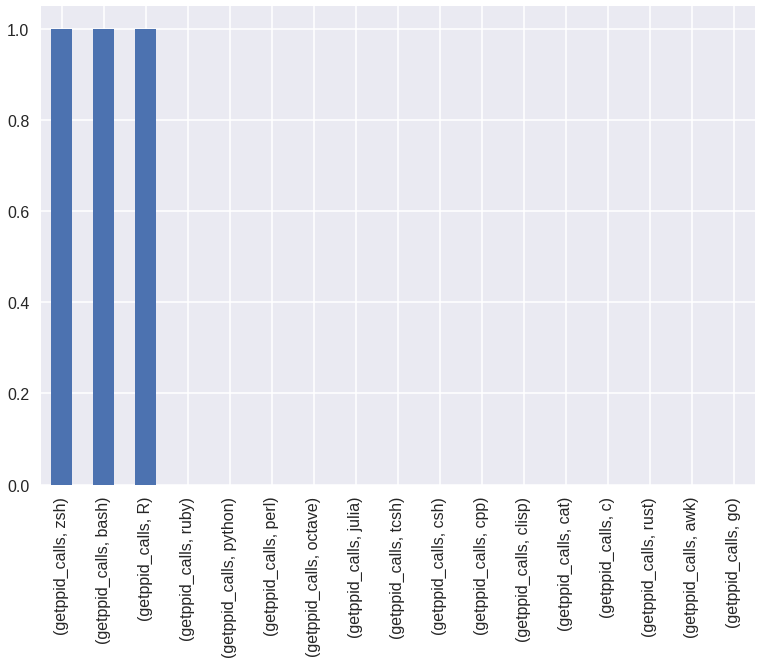

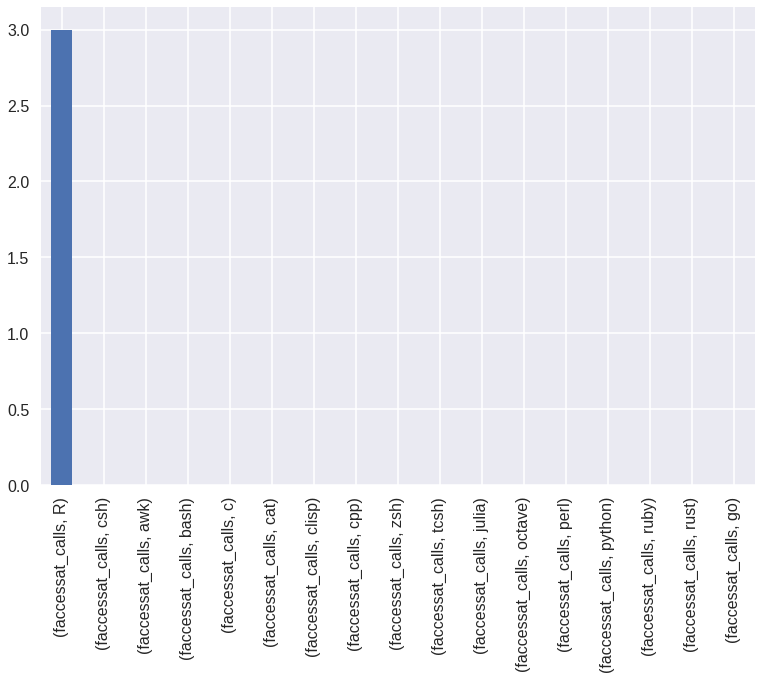

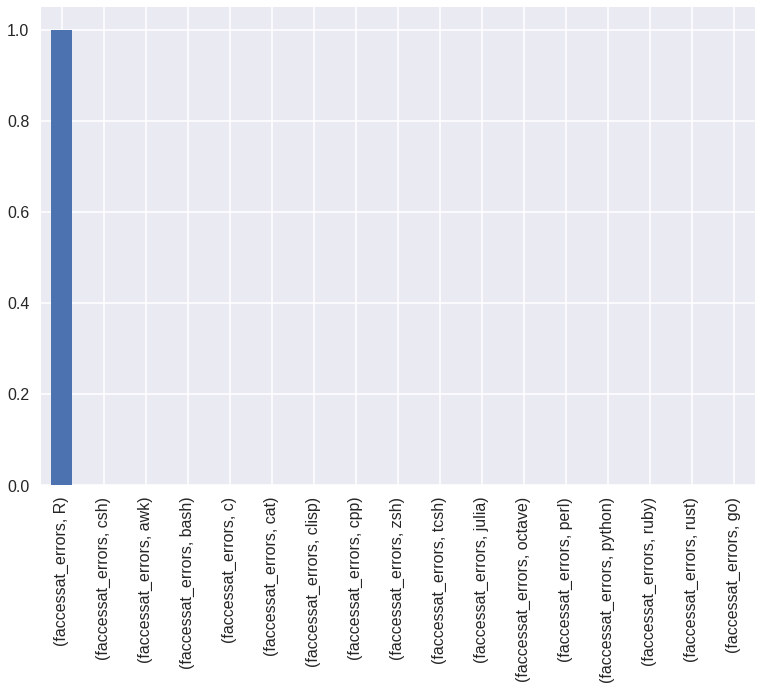

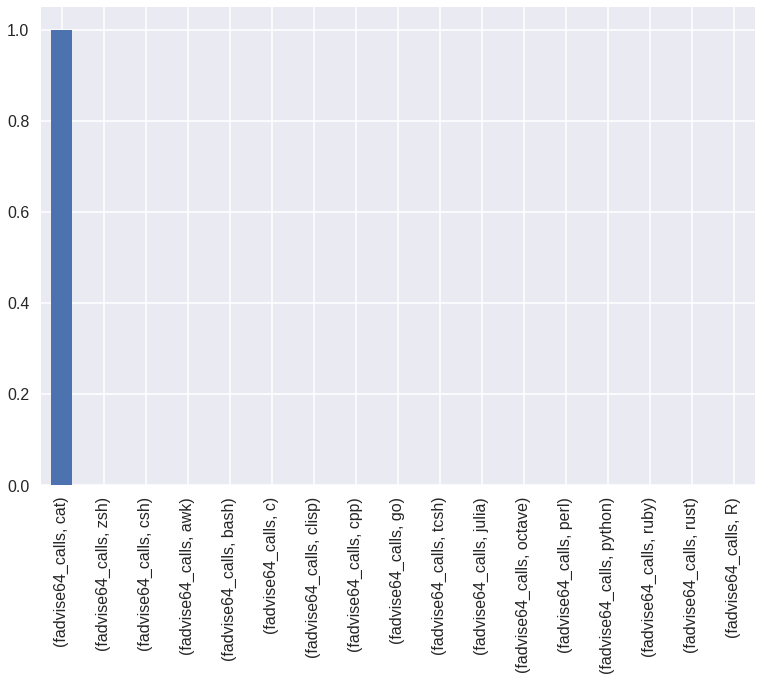

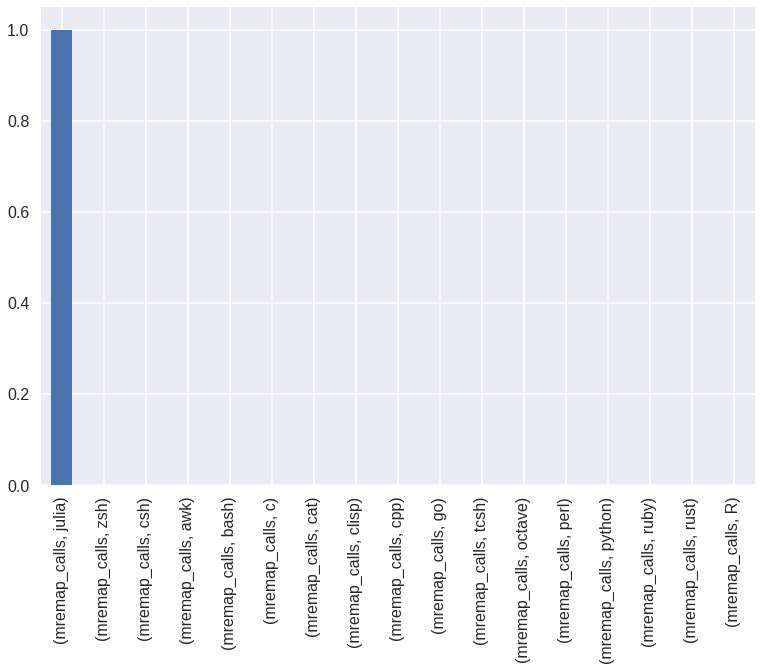

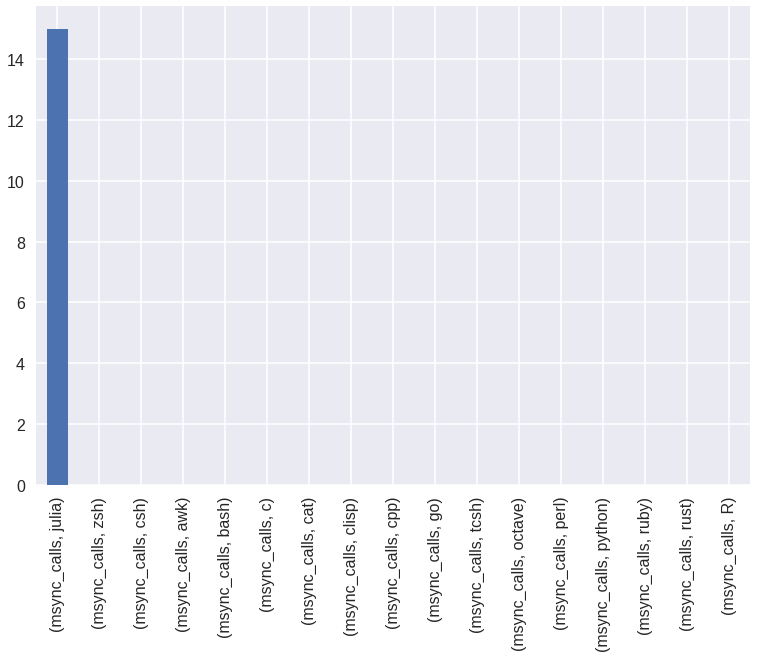

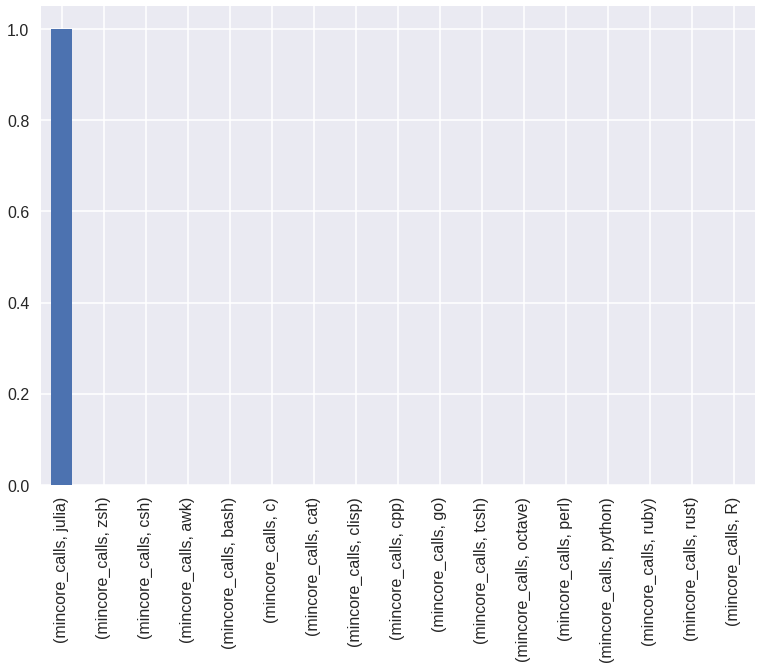

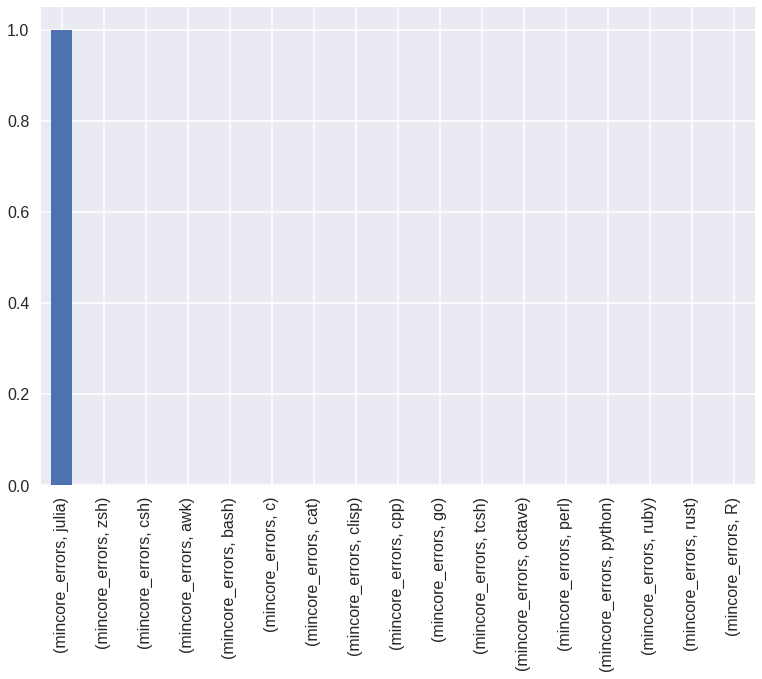

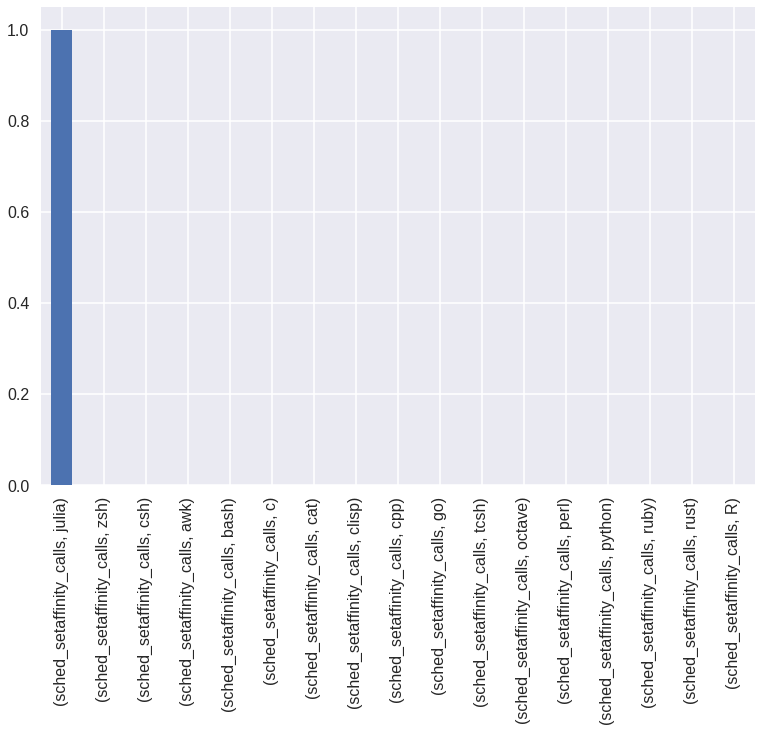

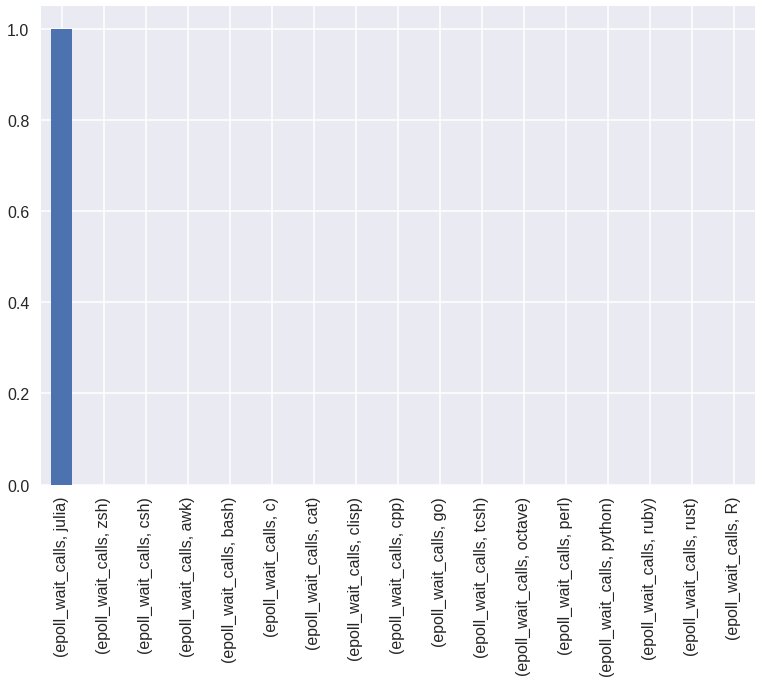

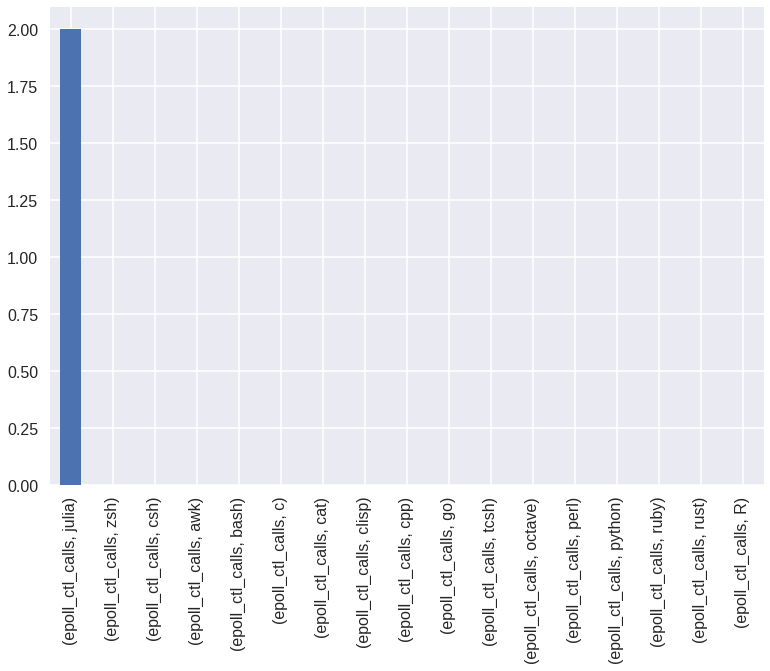

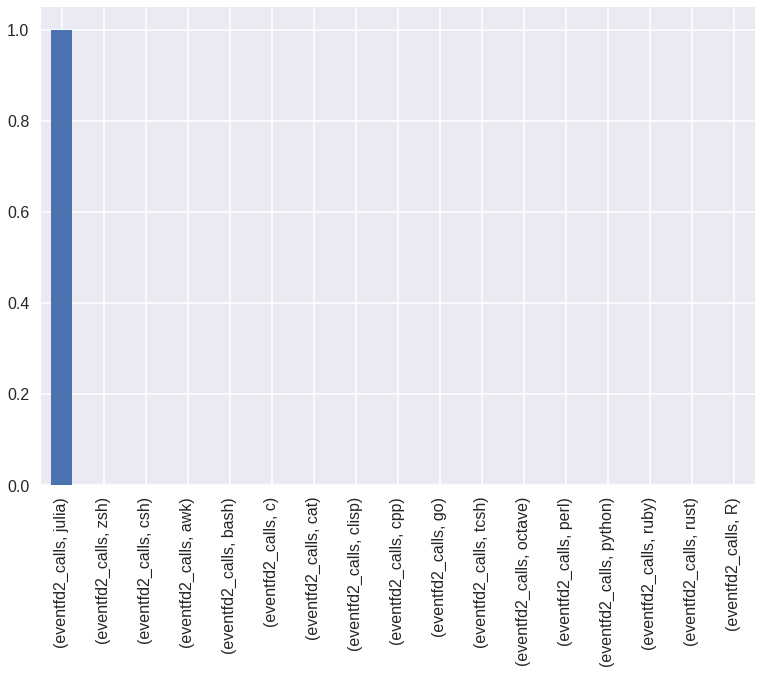

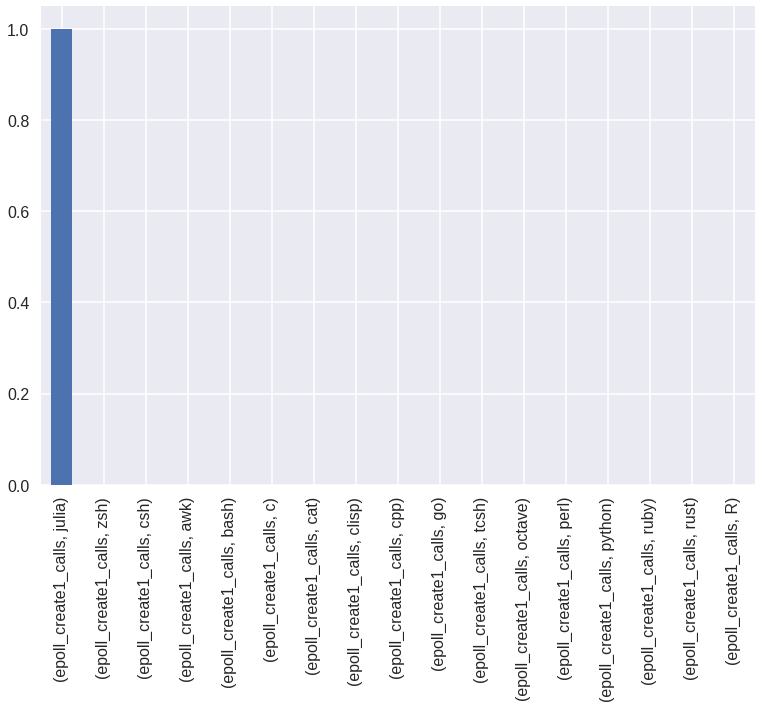

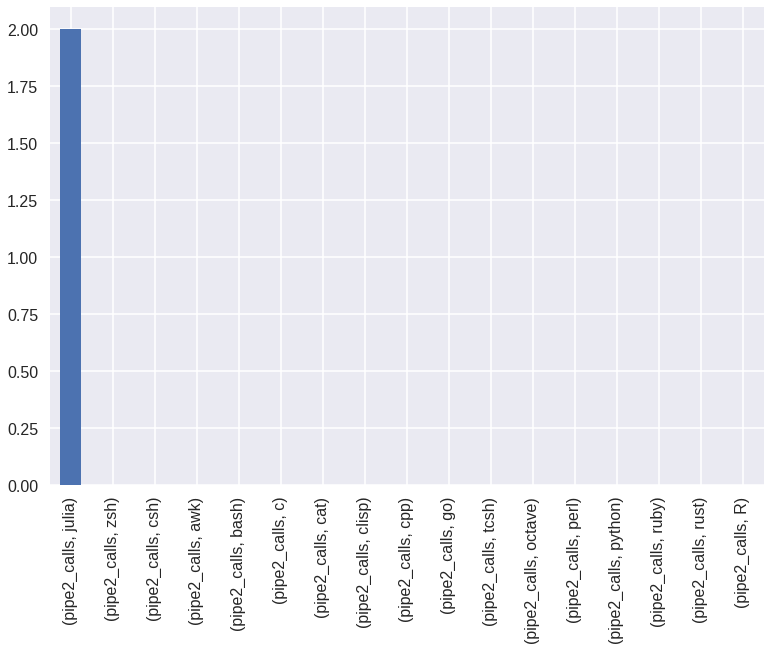

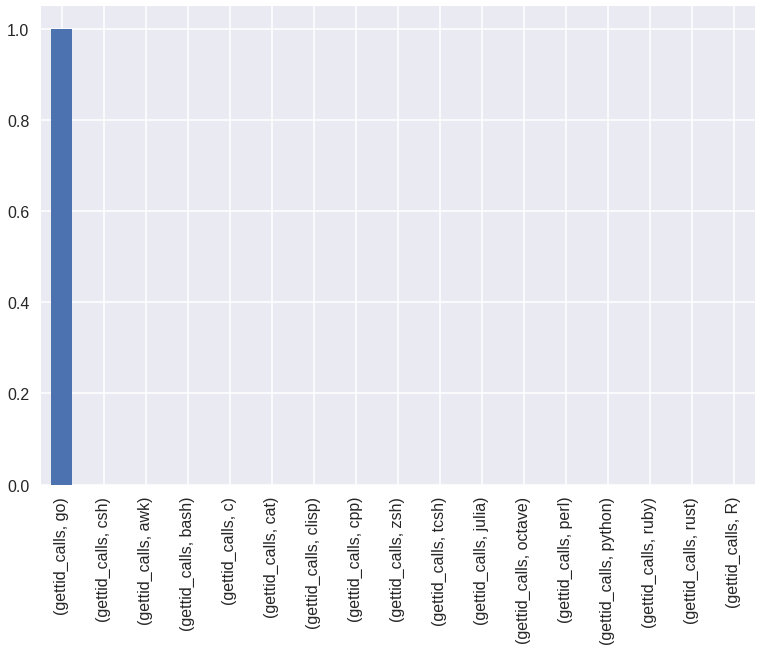

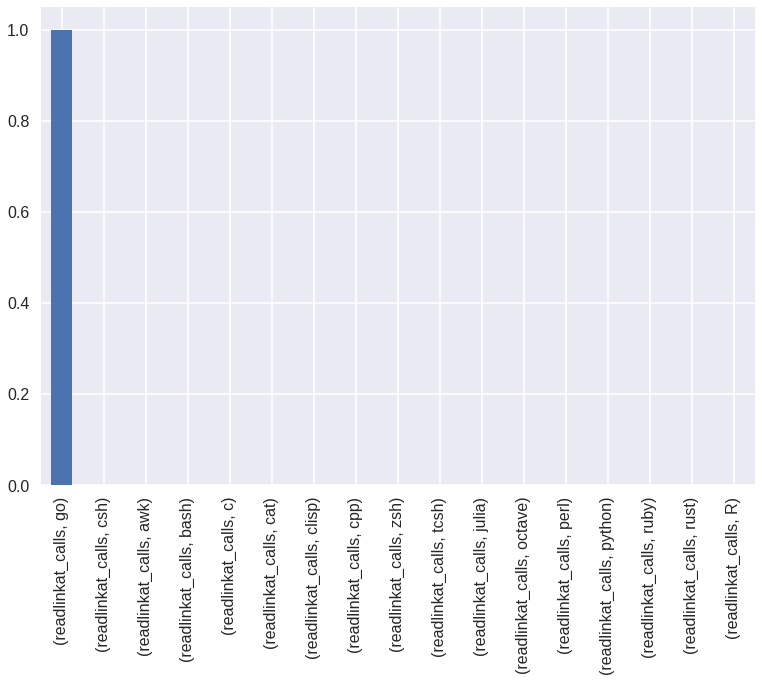

In [9]:
import matplotlib.pylab as plt
for column in data.columns:
    figure = plt.figure()
    tmp = data[column].copy()
    data_sort = tmp.groupby(level=[0]).sum().sort_values(ascending=False)
    if data_sort.sum() != 0:
        tmp = pandas.DataFrame(data_sort)
        tmp.unstack().plot.bar()